# DI 501: Introduction to Data Informatics 

## Assignment 4

### Due: June 9
---

### Submission and Grading Principles

**Assignment Submission Guidelines:**


• This is an individual assignment. Please refrain from collaboration. Upon any hurdle, you can contact your TA. It is important you adhere to academic integrity principles.

• Whenever a decision is made, justify it by referencing metrics and different trials.

• Offer commentary on the results, but keep it relevant and concise. Results with no commentary will lose up to 50% of the grade of that part.

• Your results must be shown in tables or other appropriate structures. Do not copy and paste code or outputs from your notebook for the report. This will result in grade deductions.

• Your report must include a minimum of two graphs and tables. The maximum number for both is six. Make sure the graphs you provide are exported at 300 dpi and not copied and pasted. Failing to do so or not staying within limits will result in grade reductions.

### 1. EDA and Preprocessing

To begin, get to know the expanded version of the dataset and prepare the data for training.

• Briefly analyze the features given for possible correlations with each other and the target class. Also observe the target distribution. For the most correlated features, consider engineering features out of them.

• Identify erroneous values with the help of observation quality flags. Either drop rows with those values, or impute them using a technique discussed in class.

• Divide the dataset into training and test splits with 80% and 20% of observations such that each split contains similar proportions of each class.

• Analyze the feature ranges in the training set and pick a preprocessing technique to ensure each feature spans the same scale.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
import statsmodels.api as sm
from scipy import stats
from boruta import BorutaPy
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, DetCurveDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import log_loss
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
from sklearn.cluster import DBSCAN
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv(r"/Users/esrasekerci/Desktop/DI501/assignments/elodiev2.csv")

In [3]:
df.head()

name     vr   teff  logg   feh  teffm  loggm  fehm  ca4227   g4300  \
0  HD000245 -93.73   5433  3.50 -0.76   5772   4.15 -0.59  0.5608  4.4731   
1  HD000358 -33.90  14007  3.77 -0.47  11602   4.13  0.24 -0.1160 -1.6600   
2  HD000400 -15.13   6146  4.09 -0.28   6032   3.96 -0.31  0.4514  3.0094   
3  HD000693  14.79   6156  4.13 -0.42   6052   3.96 -0.39  0.3824  2.6166   
4  HD001227  -0.03   5063  2.65  0.25   4988   2.82 -0.06  0.3831  5.9731   

   ...    tio1    tio2          sp_type  spec  q_sp_type  q_logg  q_feh  q_vr  \
0  ...  0.0103  0.0044               G0     G          D       1      3     0   
1  ...  0.0034 -0.0036       B8IV-VHgMn     B          C       1      1     0   
2  ...  0.0118  0.0003             F8IV     F          D       1      4     0   
3  ...  0.0092  0.0036  F8VFe-0.8CH-0.5     F          C       1      3     0   
4  ...  0.0104  0.0108         G8II-III     G          D       1      2     0   

   logg_m  feh_m  
0    4.15  -0.59  
1    4.13   0.24  
2    3.96  -0.31  
3    3.96  -0.39  
4    2.82  -0.06  

[5 rows x 37 columns]

In [4]:
df.shape

(1891, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1891 non-null   object 
 1   vr         1891 non-null   float64
 2   teff       1891 non-null   int64  
 3   logg       1891 non-null   float64
 4   feh        1891 non-null   float64
 5   teffm      1891 non-null   int64  
 6   loggm      1891 non-null   float64
 7   fehm       1891 non-null   float64
 8   ca4227     1891 non-null   float64
 9   g4300      1891 non-null   float64
 10  hgama      1891 non-null   float64
 11  hgamf      1891 non-null   float64
 12  fe4383     1891 non-null   float64
 13  ca4455     1891 non-null   float64
 14  fe4531     1891 non-null   float64
 15  fe4668     1891 non-null   float64
 16  hbeta      1891 non-null   float64
 17  fe5015     1891 non-null   float64
 18  mg1        1891 non-null   float64
 19  mg2        1891 non-null   float64
 20  mgb     

In [6]:
df.describe()

vr          teff         logg          feh         teffm  \
count  1891.000000   1891.000000  1891.000000  1891.000000   1891.000000   
mean      0.329963   7318.055526     3.412665    -1.039873   7766.172396   
std     118.608460   5132.116028     4.802810     9.063642   6267.044430   
min    -397.930000   3183.000000   -99.000000   -99.000000   3106.000000   
25%     -27.095000   5202.000000     3.370000    -0.250000   5184.000000   
50%      -7.570000   5975.000000     3.980000    -0.080000   5922.000000   
75%      11.240000   7050.000000     4.200000     0.000000   7316.500000   
max     999.990000  47250.000000     4.880000     1.000000  49149.000000   

             loggm         fehm       ca4227        g4300        hgama  ...  \
count  1891.000000  1891.000000  1891.000000  1891.000000  1891.000000  ...   
mean      3.380746    -0.218054     0.696503     2.646656     0.148697  ...   
std       4.803144     0.519732     0.895702     3.090192     6.760991  ...   
min     -99.000000    -2.690000    -0.902000    -3.622400   -11.847900  ...   
25%       3.225000    -0.310000     0.228250    -0.156100    -5.958550  ...   
50%       3.930000    -0.100000     0.451200     3.652200    -0.902500  ...   
75%       4.230000     0.030000     0.764350     5.385500     5.836400  ...   
max       4.910000     1.300000     6.230300     8.223300    14.198800  ...   

            fe5709       fe5782          nad         tio1         tio2  \
count  1891.000000  1891.000000  1891.000000  1891.000000  1891.000000   
mean      0.486371     0.348423     1.508600     0.014037     0.023447   
std       0.453626     0.365066     1.436358     0.040807     0.084285   
min      -1.255100    -1.665600    -0.770300    -0.053300    -0.004600   
25%       0.125000     0.089200     0.704250     0.003700     0.002500   
50%       0.386500     0.222300     1.057900     0.007700     0.004400   
75%       0.796050     0.504600     1.778750     0.012700     0.008800   
max       1.945800     1.933200    11.762900     0.489000     0.965500   

            q_logg        q_feh         q_vr       logg_m        feh_m  
count  1891.000000  1891.000000  1891.000000  1891.000000  1891.000000  
mean      0.984664     1.051296    -0.011634     3.380746    -0.218054  
std       0.139073     1.324579     0.107260     4.803144     0.519732  
min      -1.000000    -1.000000    -1.000000   -99.000000    -2.690000  
25%       1.000000     0.000000     0.000000     3.225000    -0.310000  
50%       1.000000     0.000000     0.000000     3.930000    -0.100000  
75%       1.000000     2.000000     0.000000     4.230000     0.030000  
max       1.000000     4.000000     0.000000     4.910000     1.300000  

[8 rows x 33 columns]

In [7]:
cat_cols = df.select_dtypes(include=['object', 'int64'])

In [8]:
cat_cols.nunique()

name         1353
teff         1103
teffm        1551
sp_type       554
spec            7
q_sp_type       4
q_logg          3
q_feh           6
q_vr            2
dtype: int64

In [9]:
df.drop_duplicates(subset=['name'], keep='first', inplace=True)

In [10]:
df.drop(columns=['sp_type'], inplace=True)
df.drop(columns=['name'], inplace=True)

In [11]:
df.shape

(1353, 35)

In [12]:
num_columns = df.select_dtypes(include=['float64']).columns
corr_matrix = df[num_columns].corr()

In [13]:
stats_table = df[num_columns].describe().T
stats_table

count      mean         std       min      25%     50%      75%  \
vr      1353.0  6.945388  136.601193 -397.9300 -25.4900 -5.5000  14.6800   
logg    1353.0  3.309172    4.924343  -99.0000   2.9300  3.9400   4.2000   
feh     1353.0 -0.873259    8.047909  -99.0000  -0.2500 -0.0700   0.0000   
loggm   1353.0  3.278041    4.923731  -99.0000   2.8600  3.9000   4.2100   
fehm    1353.0 -0.236792    0.538004   -2.6800  -0.3200 -0.1000   0.0300   
ca4227  1353.0  0.760570    0.952986   -0.9020   0.2420  0.4887   0.8109   
g4300   1353.0  2.904165    3.074645   -3.6068   0.1274  4.0989   5.4905   
hgama   1353.0 -0.462188    6.794055  -11.8479  -6.4960 -1.6034   4.6151   
hgamf   1353.0  1.505238    3.656036   -3.7834  -1.8327  0.7488   4.1813   
fe4383  1353.0  2.479078    2.844435   -2.8755   0.2407  2.2081   4.5963   
ca4455  1353.0  0.766175    0.688247   -0.2444   0.2839  0.5946   1.1344   
fe4531  1353.0  2.333280    1.400783   -0.5308   1.4733  2.2732   3.2730   
fe4668  1353.0  2.685103    3.097182   -5.9637   0.3269  1.7846   4.4149   
hbeta   1353.0  3.360431    2.330933   -3.9015   1.5757  2.7623   4.5753   
fe5015  1353.0  3.605026    2.405307   -1.3530   2.1818  3.4404   4.9328   
mg1     1353.0  0.040635    0.065317   -0.0965   0.0068  0.0158   0.0476   
mg2     1353.0  0.119659    0.114803   -0.0487   0.0387  0.0814   0.1593   
mgb     1353.0  2.014005    1.785273   -1.4678   0.5954  1.7296   2.9933   
fe5270  1353.0  1.788343    1.248921   -0.4849   0.9241  1.5919   2.7521   
fe5335  1353.0  1.520550    1.125182   -1.3238   0.7517  1.2958   2.2003   
fe5406  1353.0  0.944986    0.855276   -0.3177   0.3179  0.6490   1.4605   
fe5709  1353.0  0.525344    0.473702   -1.2551   0.1379  0.4366   0.8831   
fe5782  1353.0  0.380795    0.390592   -1.6656   0.0945  0.2529   0.5715   
nad     1353.0  1.615140    1.506958   -0.7703   0.7447  1.1225   1.9306   
tio1    1353.0  0.015827    0.046404   -0.0533   0.0036  0.0077   0.0128   
tio2    1353.0  0.028978    0.095542   -0.0042   0.0026  0.0047   0.0126   
logg_m  1353.0  3.278041    4.923731  -99.0000   2.8600  3.9000   4.2100   
feh_m   1353.0 -0.236792    0.538004   -2.6800  -0.3200 -0.1000   0.0300   

             max  
vr      999.9900  
logg      4.8800  
feh       1.0000  
loggm     4.9100  
fehm      1.3000  
ca4227    6.2303  
g4300     8.2233  
hgama    14.1988  
hgamf     9.6476  
fe4383    8.8585  
ca4455    3.8909  
fe4531    6.2553  
fe4668   22.0587  
hbeta     9.4145  
fe5015   25.3634  
mg1       0.3931  
mg2       0.5550  
mgb      14.3050  
fe5270    4.8938  
fe5335    4.6990  
fe5406    3.5523  
fe5709    1.9458  
fe5782    1.9332  
nad      11.7629  
tio1      0.4890  
tio2      0.9655  
logg_m    4.9100  
feh_m     1.3000

In [14]:
spec_mapping = {'O': 1, 'B': 2, 'A': 3, 'F': 4, 'G': 5, 'K': 6, 'M': 7}
df['spec'] = df['spec'].map(spec_mapping)

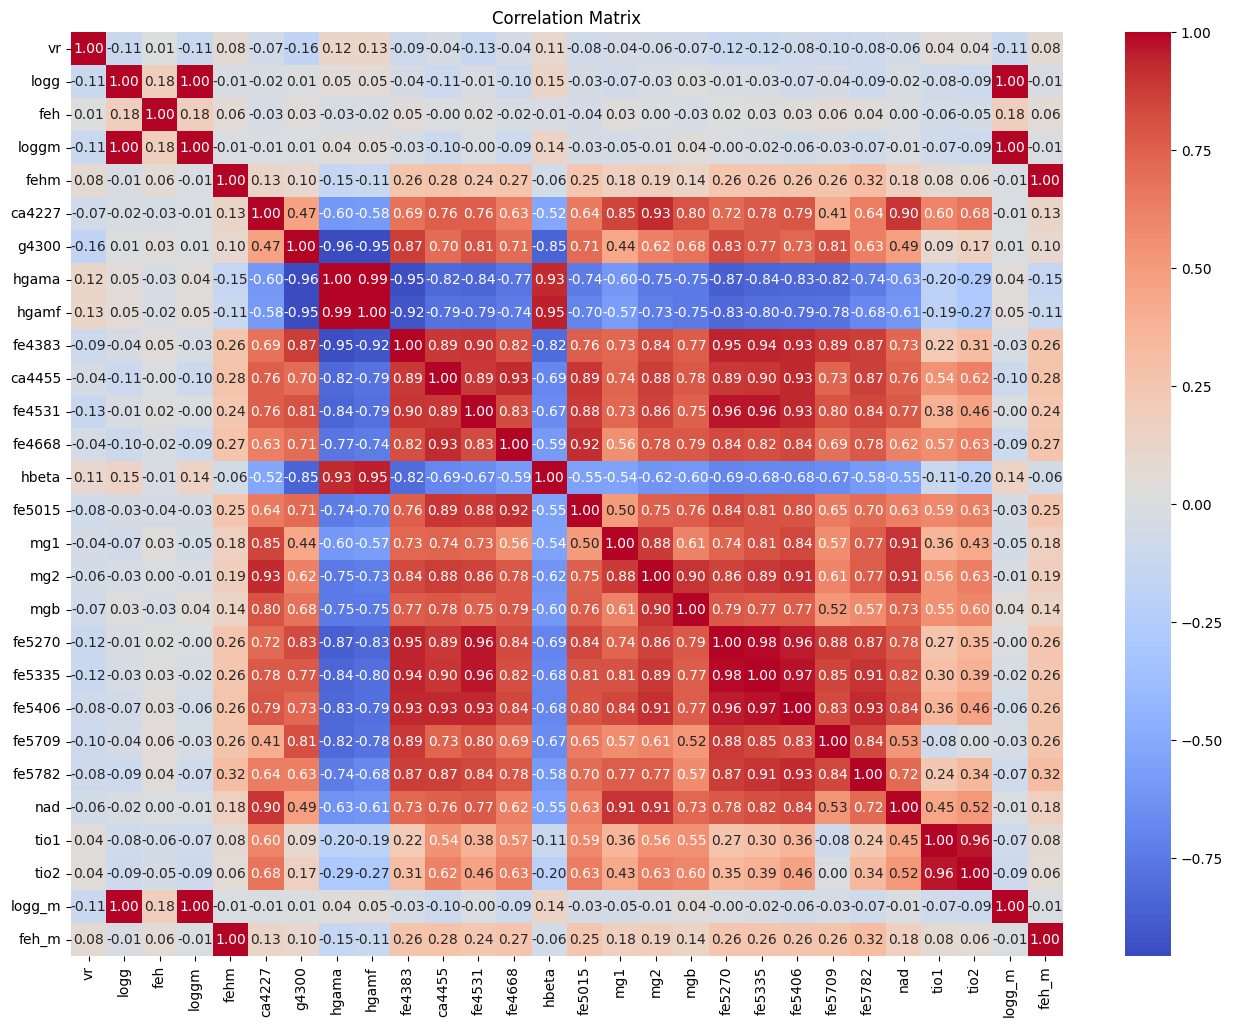

In [15]:
plt.figure(figsize=(16, 12))
sns.heatmap(df[num_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png', dpi=300)
plt.show()

In [16]:
correlations = {}
for column in num_columns:
    corr, _ = pearsonr(df['spec'], df[column])
    correlations[column] = corr

correlations = {k: v for k, v in sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True)}
print("Correlations with 'spec':")
for col, corr in correlations.items():
    print(f"{col}: {corr}")

Correlations with 'spec':
fe5270: 0.8678375778426085
fe4531: 0.8649442179949185
g4300: 0.843235228285021
fe5335: 0.8403715091507434
hgama: -0.8258204041875413
fe4383: 0.8185141156306861
hgamf: -0.8055061070960446
mgb: 0.7954672017371014
fe5406: 0.7940715666358081
fe5015: 0.7839714373333355
mg2: 0.7755609036985391
fe4668: 0.7553294609014414
ca4455: 0.7440308484856447
fe5709: 0.7098948652500268
fe5782: 0.6664097840294861
ca4227: 0.6650374195342583
hbeta: -0.6609969604840198
nad: 0.6496107468608608
mg1: 0.5686117016055062
tio2: 0.39749846220976515
tio1: 0.32402697227989186
vr: -0.17055787808677686
fehm: 0.017886376064496553
feh_m: 0.017886376064496553
feh: -0.008854397425163784
loggm: 0.008077981517587499
logg_m: 0.008077981517587499
logg: 0.00010296752603506375


/var/folders/zn/vf7dcg9j5yx547py9_y411jw0000gn/T/ipykernel_52026/1125983949.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['spec'], shade=True, color='skyblue')


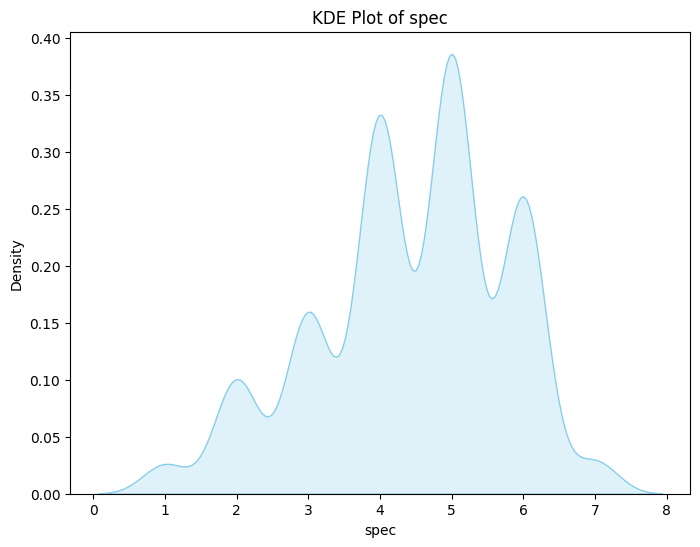

In [17]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['spec'], shade=True, color='skyblue')
plt.title('KDE Plot of spec')
plt.xlabel('spec')
plt.ylabel('Density')
plt.show()

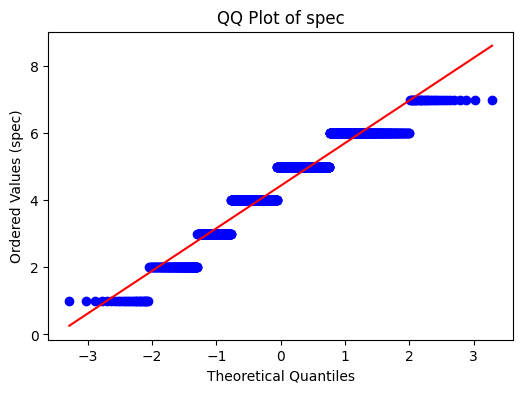

In [18]:
# QQ plot
plt.figure(figsize=(6, 4))
stats.probplot(df['spec'], dist="norm", plot=plt)
plt.title('QQ Plot of spec')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values (spec)')
plt.show()

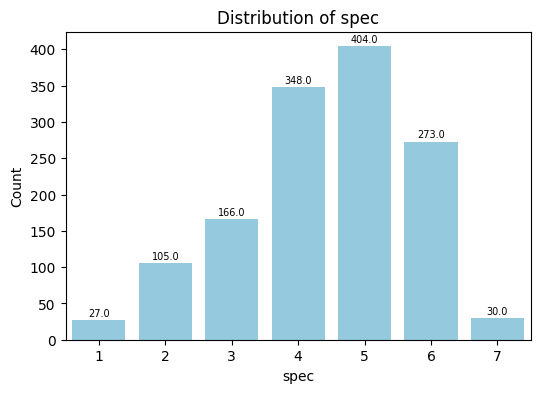

In [19]:
# Count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='spec', color='skyblue')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=7, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.title('Distribution of spec')
plt.xlabel('spec')
plt.ylabel('Count')
plt.savefig('count_plot.png', dpi=300)
plt.show()

In [20]:
correlation_matrix = df[num_columns].corr().abs()

# Set threshold for correlation coefficient
threshold = 0.7

# Find pairs of highly correlated features
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = []
for col in upper.columns:
    correlated_cols = upper.index[upper[col] > threshold].tolist()
    for feat in correlated_cols:
        if feat != col and feat not in to_drop and col not in to_drop:
            if 'spec' in correlation_matrix.columns:
                corr_target_feat = correlation_matrix.loc[feat, 'spec']
                corr_target_col = correlation_matrix.loc[col, 'spec']
                if corr_target_feat > corr_target_col:
                    to_drop.append(col)
                else:
                    to_drop.append(feat)
            else:
                to_drop.append(col)

# Drop highly correlated features from the dataframe
df_filtered1 = df.drop(to_drop, axis=1)

In [21]:
df_filtered1

vr   teff  logg   feh  teffm  fehm  ca4227   g4300  fe5782    tio1  \
0    -93.73   5433  3.50 -0.76   5772 -0.59  0.5608  4.4731  0.0876  0.0103   
1    -33.90  14007  3.77 -0.47  11602  0.24 -0.1160 -1.6600  0.0860  0.0034   
2    -15.13   6146  4.09 -0.28   6032 -0.31  0.4514  3.0094  0.1544  0.0118   
3     14.79   6156  4.13 -0.42   6052 -0.39  0.3824  2.6166  0.0893  0.0092   
4     -0.03   5063  2.65  0.25   4988 -0.06  0.3831  5.9731  0.5842  0.0104   
...     ...    ...   ...   ...    ...   ...     ...     ...     ...     ...   
1885 -47.78   4484  4.36  0.00   4488 -0.07  3.6854  5.3363  0.9112  0.0102   
1886   0.58   4605  2.71  0.00   4770  0.03  0.6104  6.3916  0.8654  0.0109   
1887 -43.02   4475  4.47  0.10   4314 -0.02  4.5096  4.6322  1.1023  0.0108   
1889  -4.05   4690  2.67 -0.05   4870 -0.13  0.7173  6.2416  0.6685  0.0076   
1890 -34.80   4533  2.76  0.10   4664 -0.19  0.9388  6.1563  0.7617  0.0134   

      spec q_sp_type  q_logg  q_feh  q_vr  
0        5         D       1      3     0  
1        2         C       1      1     0  
2        4         D       1      4     0  
3        4         C       1      3     0  
4        5         D       1      2     0  
...    ...       ...     ...    ...   ...  
1885     6         E       1      0     0  
1886     6         C       1      0     0  
1887     6         B       0      2     0  
1889     6         E       1      0     0  
1890     6         C       1      0     0  

[1353 rows x 15 columns]

In this feature engineering process, the code computes a correlation matrix for the numerical columns of the dataframe df to identify highly correlated features. It sets a threshold at 0.7 to determine when features are considered highly correlated, using an upper triangular matrix to avoid redundant comparisons. For each column, it identifies other columns that exceed the correlation threshold and makes decisions based on their correlation with a specified target column ('spec' if available). The goal is to retain the most informative features while dropping those that are highly correlated to reduce multicollinearity. This approach ensures that the dataset used for subsequent analysis or modeling is optimized, enhancing model interpretability and performance by eliminating redundancy and potential overfitting issues associated with highly correlated features.

In [22]:
def drop_high_vif_features(df, target_col, threshold=10):
    num_columns = df.select_dtypes(include=['float64']).columns
    vif_df = pd.DataFrame()
    vif_df["Feature"] = num_columns
    vif_df["VIF"] = [vif(df[num_columns].values, i) for i in range(len(num_columns))]
    vif_df = vif_df.sort_values(by="VIF", ascending=False)
    
    while vif_df.iloc[0]["VIF"] > threshold:
        drop_feature = vif_df.iloc[0]["Feature"]
        if drop_feature != target_col:
            df = df.drop(drop_feature, axis=1)
            num_columns = df.select_dtypes(include=['float64']).columns
            vif_df = pd.DataFrame()
            vif_df["Feature"] = num_columns
            vif_df["VIF"] = [vif(df[num_columns].values, i) for i in range(len(num_columns))]
            vif_df = vif_df.sort_values(by="VIF", ascending=False)
        else:
            break
    
    return df

In [23]:
df_filtered2 = drop_high_vif_features(df, target_col='spec', threshold=10)
df_filtered2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


vr   teff   feh  teffm  loggm  fehm   g4300   hbeta     mg1     mgb  \
0    -93.73   5433 -0.76   5772   4.15 -0.59  4.4731  2.4979  0.0165  2.2939   
1    -33.90  14007 -0.47  11602   4.13  0.24 -1.6600  6.1152  0.0135  0.1180   
2    -15.13   6146 -0.28   6032   3.96 -0.31  3.0094  3.4020  0.0116  1.3677   
3     14.79   6156 -0.42   6052   3.96 -0.39  2.6166  3.3406  0.0082  1.1925   
4     -0.03   5063  0.25   4988   2.82 -0.06  5.9731  1.7726  0.0423  2.2486   
...     ...    ...   ...    ...    ...   ...     ...     ...     ...     ...   
1885 -47.78   4484  0.00   4488   4.52 -0.07  5.3363  0.2184  0.2541  6.3677   
1886   0.58   4605  0.00   4770   2.73  0.03  6.3916  1.4696  0.0648  2.9318   
1887 -43.02   4475  0.10   4314   4.65 -0.02  4.6322 -0.4581  0.3275  5.8894   
1889  -4.05   4690 -0.05   4870   2.66 -0.13  6.2416  1.5422  0.0451  2.4555   
1890 -34.80   4533  0.10   4664   2.50 -0.19  6.1563  1.2379  0.0649  2.9602   

      fe5782    tio1  spec q_sp_type  q_logg  q_feh  q_vr  
0     0.0876  0.0103     5         D       1      3     0  
1     0.0860  0.0034     2         C       1      1     0  
2     0.1544  0.0118     4         D       1      4     0  
3     0.0893  0.0092     4         C       1      3     0  
4     0.5842  0.0104     5         D       1      2     0  
...      ...     ...   ...       ...     ...    ...   ...  
1885  0.9112  0.0102     6         E       1      0     0  
1886  0.8654  0.0109     6         C       1      0     0  
1887  1.1023  0.0108     6         B       0      2     0  
1889  0.6685  0.0076     6         E       1      0     0  
1890  0.7617  0.0134     6         C       1      0     0  

[1353 rows x 17 columns]

The drop_high_vif_features function is designed to identify and remove columns from a DataFrame that exhibit high multicollinearity, which can distort statistical analyses such as regression models. First, it selects numeric columns from the DataFrame and computes the Variance Inflation Factor (VIF) for each column using the variance_inflation_factor function from statsmodels. The function then sorts these columns based on their VIF values in descending order. It iteratively evaluates the column with the highest VIF and removes it from the DataFrame if its VIF exceeds a specified threshold. This process continues until no column in the DataFrame surpasses the threshold, excluding a specified target column from potential removals to retain essential predictors. The result is a DataFrame with reduced multicollinearity, facilitating more reliable statistical modeling and interpretation of relationships among variables.

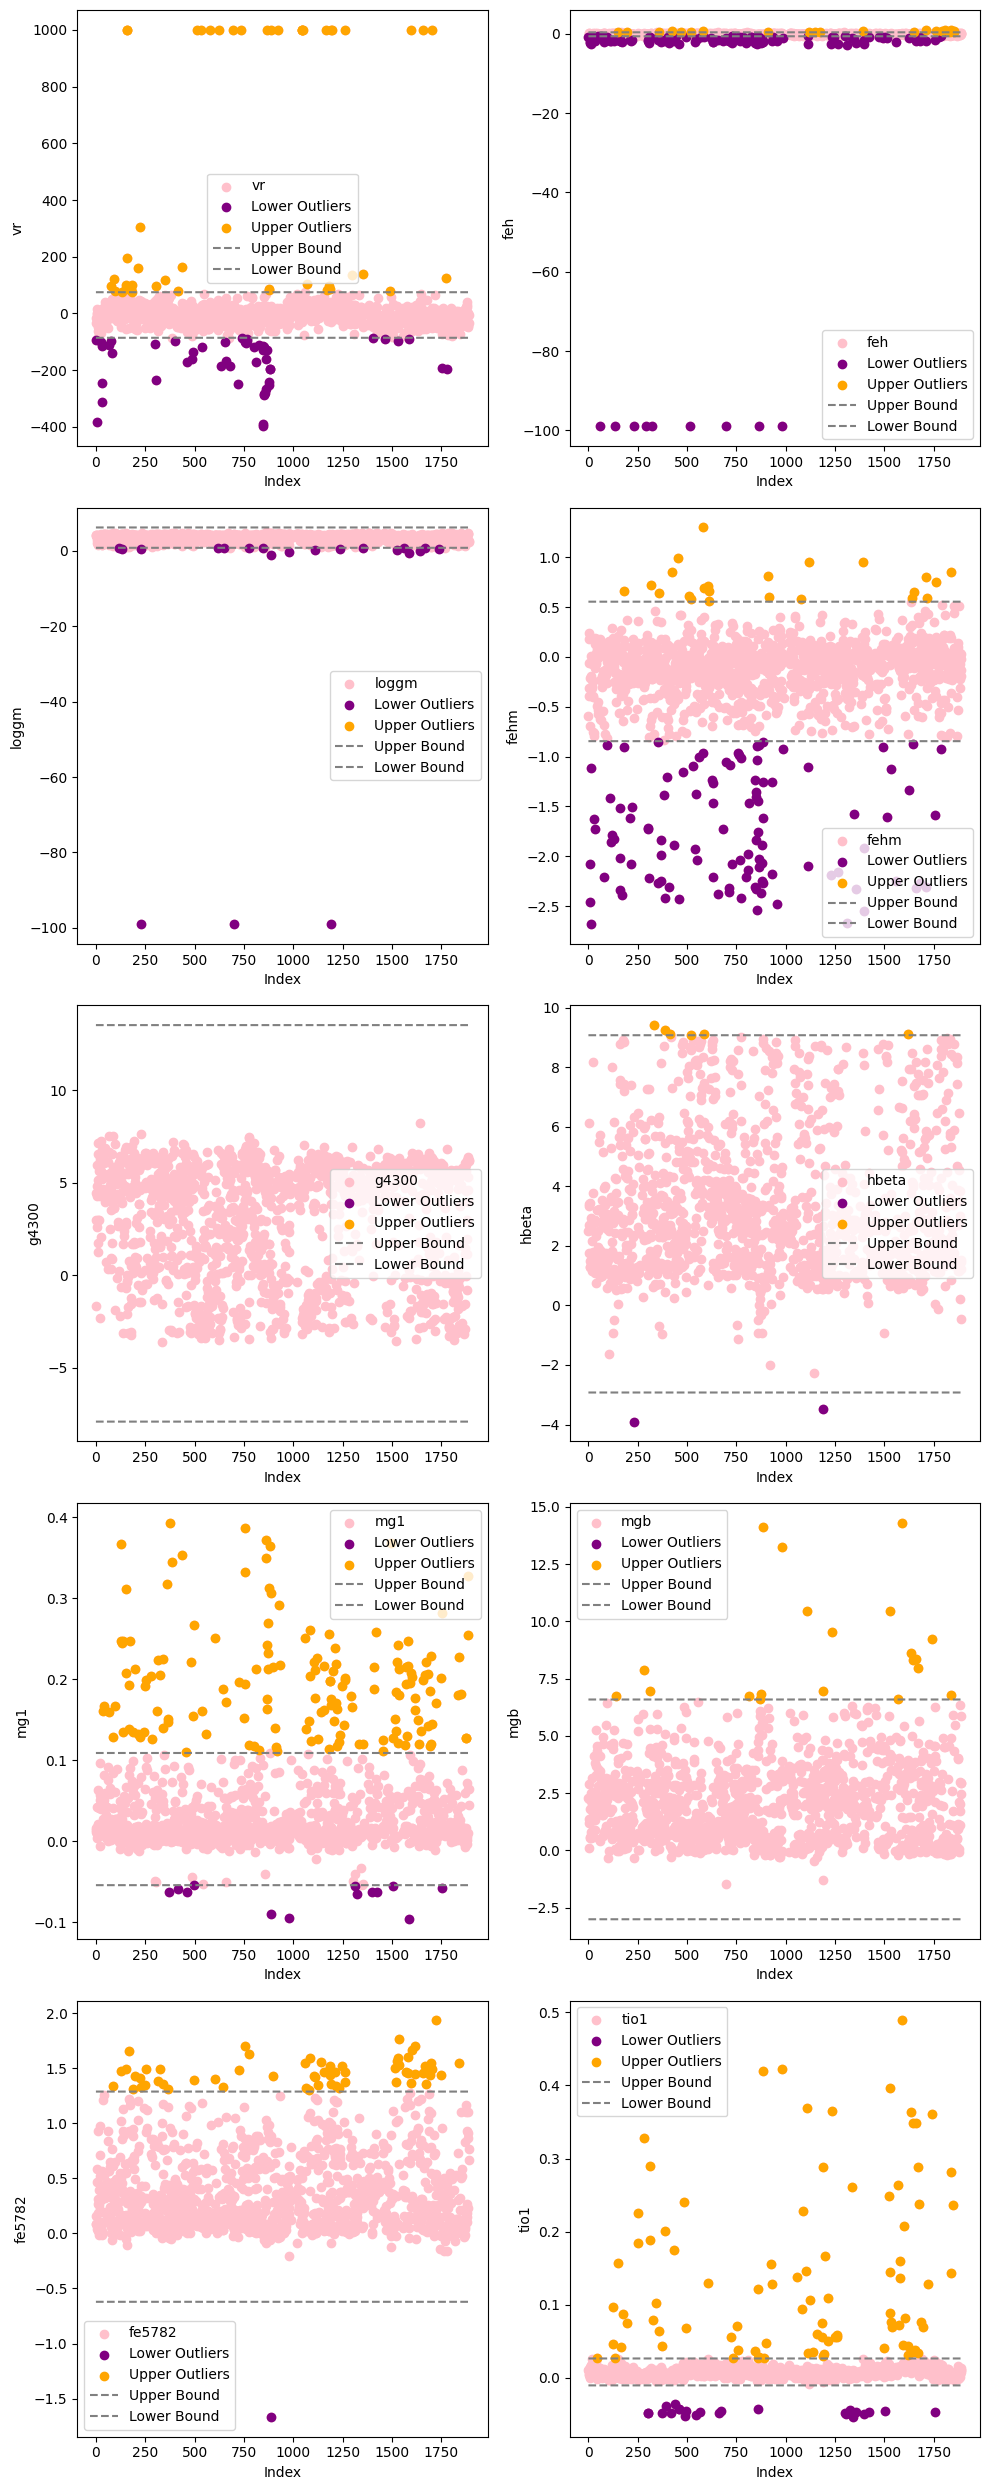

In [24]:
num_columns = df_filtered2.select_dtypes(include='float64').columns

Q1 = df_filtered2[num_columns].quantile(0.25)
Q3 = df_filtered2[num_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

num_plots = len(num_columns)
num_rows = (num_plots + 1) // 2

fig, axs = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))
fig.tight_layout(pad=3.0)

for i, col in enumerate(num_columns):
    row = i // 2
    col_num = i % 2
    axs[row, col_num].scatter(df_filtered2.index, df_filtered2[col], label=col, color='pink')
    axs[row, col_num].scatter(df_filtered2[df_filtered2[col] < lower_bound[col]].index, df_filtered2[col][df_filtered2[col] < lower_bound[col]], color='purple', label='Lower Outliers')
    axs[row, col_num].scatter(df_filtered2[df_filtered2[col] > upper_bound[col]].index, df_filtered2[col][df_filtered2[col] > upper_bound[col]], color='orange', label='Upper Outliers')
    axs[row, col_num].plot(df_filtered2.index, [upper_bound[col]] * len(df_filtered2), color='gray', linestyle='--', label='Upper Bound')
    axs[row, col_num].plot(df_filtered2.index, [lower_bound[col]] * len(df_filtered2), color='gray', linestyle='--', label='Lower Bound')
    axs[row, col_num].set_xlabel('Index')
    axs[row, col_num].set_ylabel(col)
    axs[row, col_num].legend()

if num_plots % 2 != 0:
    fig.delaxes(axs[num_rows - 1, 1])
plt.tight_layout()

# Exporting the plot at 300 dpi
plt.savefig('scatter_with_outliers.png', dpi=300)

plt.show()

In [25]:
cols_of_interest = ['q_sp_type', 'q_logg', 'q_feh', 'q_vr']
df_filtered2[cols_of_interest].describe()

q_logg        q_feh         q_vr
count  1353.000000  1353.000000  1353.000000
mean      0.983740     1.002956    -0.016260
std       0.142988     1.343401     0.126521
min      -1.000000    -1.000000    -1.000000
25%       1.000000     0.000000     0.000000
50%       1.000000     0.000000     0.000000
75%       1.000000     2.000000     0.000000
max       1.000000     4.000000     0.000000

In [26]:
df_filtered2[(df_filtered2['q_logg'] == -1) | (df_filtered2['q_feh'] == -1) | (df_filtered2['q_vr'] == -1)]

vr   teff    feh  teffm  loggm  fehm   g4300   hbeta     mg1  \
61    -52.07   7287 -99.00   7268   4.10 -0.62  0.3259  5.7124 -0.0003   
137     9.43   9804 -99.00  10168   4.38 -0.14 -3.1054  4.2683  0.0052   
156   999.99  32000   0.00  32390   3.30 -0.02 -0.3701  1.6646  0.0205   
159   999.99  10373   0.00  11619   3.90 -0.21 -2.0752  7.4467  0.0188   
229     5.34  20927   0.00  20927 -99.00  0.00 -1.4280 -3.9015  0.0333   
231     4.20   5700 -99.00   6928   4.82  0.08  4.8367  2.3757  0.0365   
291   -43.01   5895 -99.00   6331   4.16 -0.13  4.5352  2.9057  0.0163   
320     4.82   6210 -99.00   6435   4.47 -0.05  3.3904  3.1347  0.0179   
510   999.99  10341   0.00  15036   3.59 -0.11 -1.8240  5.6077  0.0103   
516   -23.31   6938 -99.00   7102   4.21 -0.54  0.8764  4.9363  0.0060   
531   999.99  13268  -0.10  14369   3.48  0.14 -1.6386  5.5985  0.0231   
579   999.99   8856  -0.10  11640   3.98 -0.17 -2.2827  7.2520  0.0077   
624   999.99   9950  -0.10   9730   3.82 -0.69 -3.4922  8.8365  0.0138   
693   999.99  11172   0.00  13693   3.71 -0.12 -2.0012  6.1069  0.0170   
699    -0.14   8330 -99.00   8330 -99.00  0.00 -3.3318  4.8888  0.0284   
735   999.99   8896  -0.10   9812   3.91 -0.56 -2.8624  8.2087  0.0047   
866   999.99   7446   0.00   7752   4.00 -0.02 -0.9407  7.0182 -0.0004   
867    24.74   4670 -99.00   4602   3.82 -0.69  5.6632  0.5471  0.1756   
887   999.99   3772  -1.84   3564  -0.99 -1.62  4.1826  3.3576 -0.0897   
922   999.99  30514   0.00  30652   2.65 -0.07 -0.5136 -1.9960  0.0194   
980    45.62   3725 -99.00   3130  -0.34 -0.33  2.7442  4.6493 -0.0949   
1044  999.99   7954  -0.10  10840   4.01 -0.23 -2.3355  7.9302  0.0074   
1045  999.99  10251   0.00  11138   3.97 -0.30 -2.5226  7.4815  0.0158   
1046  999.99   9867  -0.10   9860   3.76 -0.73 -3.1772  8.8988  0.0088   
1047  999.99  16901   0.00  18364   3.17 -0.05 -1.8167  3.5418  0.0172   
1167  999.99  24957   0.00  21266   2.99 -0.04 -1.1227  2.5943  0.0049   
1190  999.99  24815   0.00  24815 -99.00  0.00 -1.6946 -3.4722  0.0170   
1197  999.99   7010  -0.10   7084   4.37 -0.64  0.3548  4.6799  0.0064   
1262  999.99   7256  -0.10   7432   4.08 -0.56 -0.3027  6.0390  0.0001   
1596  999.99  11387   0.00  15065   3.59 -0.20 -1.9316  5.6251 -0.0010   
1658  999.99   9790  -0.10  10520   3.95 -0.40 -2.7852  8.1790  0.0052   
1705  999.99   9739   0.00  14671   3.62 -0.05 -1.5622  5.5873  0.0166   

          mgb  fe5782    tio1  spec q_sp_type  q_logg  q_feh  q_vr  
61     0.4243  0.1535  0.0019     4         D       1     -1     0  
137    0.0728  0.0886  0.0016     3         C       0     -1     0  
156   -0.0007 -0.1070  0.0025     1         C       1      0    -1  
159    0.2125  0.0564  0.0158     2         D       1      0    -1  
229   -0.3252  0.3408  0.0014     2         C      -1      0     0  
231    3.0234  0.4310  0.0005     5         D       0     -1     0  
291    1.7973  0.2646  0.0055     5         D       0     -1     0  
320    2.0671  0.3114  0.0099     4         C       0     -1     0  
510    0.0139  0.0891  0.0127     2         D       1      0    -1  
516    0.5769  0.1454  0.0150     4         E       1     -1     0  
531   -0.0073  0.1186  0.0181     2         D       1      0    -1  
579    0.2681  0.1611  0.0127     2         D       1      0    -1  
624    0.3568  0.0281  0.0206     2         C       1      0    -1  
693    0.0250  0.0598  0.0119     2         E       1      0    -1  
699   -1.4678  0.0297  0.0176     3         C      -1     -1     0  
735    0.4503  0.0924  0.0065     3         E       1      0    -1  
866    0.1291  0.0888  0.0038     2         E       1      0    -1  
867    5.3529  0.9668  0.0052     6         C       0     -1     0  
887   14.1378 -1.6656  0.4202     7         C       1      0    -1  
922   -0.2154 -0.0461 -0.0019     2         C       1      0    -1  
980   13.2514 -0.2034  0.4224     7         C       0     -1     0  
1044   0.2305  0.1452  0.0056     2         D    

In [27]:
df_filtered2[df_filtered2['q_sp_type'] == 'E']

vr  teff   feh  teffm  loggm  fehm   g4300   hbeta     mg1     mgb  \
8    -61.36  4920 -2.32   4744   1.49 -2.46  1.7691  1.3064  0.0046  0.5535   
11   -47.62  5991 -1.25   6049   4.25 -1.11  1.2431  2.9469  0.0078  0.7948   
15   -61.71  4933 -2.70   4919   1.86 -2.68  2.9696  1.3082  0.0105  0.5367   
20   -23.56  4385 -0.27   4447   2.10 -0.07  6.2626  1.1668  0.0970  3.1492   
75   -16.29  6970 -0.05   6774   4.06 -0.14  0.3521  5.1374  0.0014  0.6412   
...     ...   ...   ...    ...    ...   ...     ...     ...     ...     ...   
1881  -1.60  6403 -0.21   6241   4.09 -0.31  1.9382  3.8531  0.0046  1.1042   
1882  23.29  6318  0.00   6147   4.20  0.00  2.9821  3.4946  0.0083  1.7131   
1883 -10.48  4500  0.05   4658   2.61  0.04  6.2359  1.4104  0.0718  3.0006   
1885 -47.78  4484  0.00   4488   4.52 -0.07  5.3363  0.2184  0.2541  6.3677   
1889  -4.05  4690 -0.05   4870   2.66 -0.13  6.2416  1.5422  0.0451  2.4555   

      fe5782    tio1  spec q_sp_type  q_logg  q_feh  q_vr  
8     0.0520  0.0105     4         E       1      4     0  
11    0.0187  0.0180     4         E       1      4     0  
15   -0.0128  0.0051     5         E       1      3     0  
20    0.9705  0.0263     5         E       1      2     0  
75    0.0583  0.0029     4         E       1      0     0  
...      ...     ...   ...       ...     ...    ...   ...  
1881  0.1072  0.0009     4         E       1      0     0  
1882  0.2686  0.0047     5         E       1      0     0  
1883  0.9247  0.0070     6         E       1      0     0  
1885  0.9112  0.0102     6         E       1      0     0  
1889  0.6685  0.0076     6         E       1      0     0  

[248 rows x 17 columns]

In [28]:
df_imputed = df_filtered2.replace({
    'loggm': -99.00,
    'feh': -99.00,
    'vr': 999.99
}, np.nan)

In [29]:
df_imputed[(df_imputed['q_logg'] == -1) | (df_imputed['q_feh'] == -1) | (df_imputed['q_vr'] == -1)]

vr   teff   feh  teffm  loggm  fehm   g4300   hbeta     mg1      mgb  \
61   -52.07   7287   NaN   7268   4.10 -0.62  0.3259  5.7124 -0.0003   0.4243   
137    9.43   9804   NaN  10168   4.38 -0.14 -3.1054  4.2683  0.0052   0.0728   
156     NaN  32000  0.00  32390   3.30 -0.02 -0.3701  1.6646  0.0205  -0.0007   
159     NaN  10373  0.00  11619   3.90 -0.21 -2.0752  7.4467  0.0188   0.2125   
229    5.34  20927  0.00  20927    NaN  0.00 -1.4280 -3.9015  0.0333  -0.3252   
231    4.20   5700   NaN   6928   4.82  0.08  4.8367  2.3757  0.0365   3.0234   
291  -43.01   5895   NaN   6331   4.16 -0.13  4.5352  2.9057  0.0163   1.7973   
320    4.82   6210   NaN   6435   4.47 -0.05  3.3904  3.1347  0.0179   2.0671   
510     NaN  10341  0.00  15036   3.59 -0.11 -1.8240  5.6077  0.0103   0.0139   
516  -23.31   6938   NaN   7102   4.21 -0.54  0.8764  4.9363  0.0060   0.5769   
531     NaN  13268 -0.10  14369   3.48  0.14 -1.6386  5.5985  0.0231  -0.0073   
579     NaN   8856 -0.10  11640   3.98 -0.17 -2.2827  7.2520  0.0077   0.2681   
624     NaN   9950 -0.10   9730   3.82 -0.69 -3.4922  8.8365  0.0138   0.3568   
693     NaN  11172  0.00  13693   3.71 -0.12 -2.0012  6.1069  0.0170   0.0250   
699   -0.14   8330   NaN   8330    NaN  0.00 -3.3318  4.8888  0.0284  -1.4678   
735     NaN   8896 -0.10   9812   3.91 -0.56 -2.8624  8.2087  0.0047   0.4503   
866     NaN   7446  0.00   7752   4.00 -0.02 -0.9407  7.0182 -0.0004   0.1291   
867   24.74   4670   NaN   4602   3.82 -0.69  5.6632  0.5471  0.1756   5.3529   
887     NaN   3772 -1.84   3564  -0.99 -1.62  4.1826  3.3576 -0.0897  14.1378   
922     NaN  30514  0.00  30652   2.65 -0.07 -0.5136 -1.9960  0.0194  -0.2154   
980   45.62   3725   NaN   3130  -0.34 -0.33  2.7442  4.6493 -0.0949  13.2514   
1044    NaN   7954 -0.10  10840   4.01 -0.23 -2.3355  7.9302  0.0074   0.2305   
1045    NaN  10251  0.00  11138   3.97 -0.30 -2.5226  7.4815  0.0158   0.1047   
1046    NaN   9867 -0.10   9860   3.76 -0.73 -3.1772  8.8988  0.0088   0.2850   
1047    NaN  16901  0.00  18364   3.17 -0.05 -1.8167  3.5418  0.0172  -0.1199   
1167    NaN  24957  0.00  21266   2.99 -0.04 -1.1227  2.5943  0.0049  -0.0726   
1190    NaN  24815  0.00  24815    NaN  0.00 -1.6946 -3.4722  0.0170  -1.3015   
1197    NaN   7010 -0.10   7084   4.37 -0.64  0.3548  4.6799  0.0064   0.8024   
1262    NaN   7256 -0.10   7432   4.08 -0.56 -0.3027  6.0390  0.0001   0.4301   
1596    NaN  11387  0.00  15065   3.59 -0.20 -1.9316  5.6251 -0.0010   0.0267   
1658    NaN   9790 -0.10  10520   3.95 -0.40 -2.7852  8.1790  0.0052   0.4009   
1705    NaN   9739  0.00  14671   3.62 -0.05 -1.5622  5.5873  0.0166   0.1530   

      fe5782    tio1  spec q_sp_type  q_logg  q_feh  q_vr  
61    0.1535  0.0019     4         D       1     -1     0  
137   0.0886  0.0016     3         C       0     -1     0  
156  -0.1070  0.0025     1         C       1      0    -1  
159   0.0564  0.0158     2         D       1      0    -1  
229   0.3408  0.0014     2         C      -1      0     0  
231   0.4310  0.0005     5         D       0     -1     0  
291   0.2646  0.0055     5         D       0     -1     0  
320   0.3114  0.0099     4         C       0     -1     0  
510   0.0891  0.0127     2         D       1      0    -1  
516   0.1454  0.0150     4         E       1     -1     0  
531   0.1186  0.0181     2         D       1      0    -1  
579   0.1611  0.0127     2         D       1      0    -1  
624   0.0281  0.0206     2         C       1      0    -1  
693   0.0598  0.0119     2         E       1      0    -1  
699   0.0297  0.0176     3         C      -1     -1     0  
735   0.0924  0.0065     3         E       1      0    -1  
866   0.0888  0.0038     2         E       1      0    -1  
867   0.9668  0.0052     6         C       0     -1     0  
887  -1.6656  0.4202     7         C       1      0    -1  
922  -0.0461 -0.0019     2         C       1      0    -1  
980  -0.2034  0.4224     7         C       0     -1     0  
1044  0.1452  0

In [30]:
missingness_perc = df_imputed[['loggm', 'feh', 'vr']].isnull().mean() * 100
print("Missingness Percentages:")
print(missingness_perc)

Missingness Percentages:
loggm    0.221729
feh      0.665188
vr       1.626016
dtype: float64


In [31]:
df_imputed[['loggm', 'feh', 'vr']].describe()

loggm          feh           vr
count  1350.000000  1344.000000  1331.000000
mean      3.505326    -0.216161    -9.468573
std       0.990905     0.493778    48.855648
min      -0.990000    -2.790000  -397.930000
25%       2.875000    -0.250000   -26.145000
50%       3.900000    -0.070000    -5.950000
75%       4.210000     0.000000    13.460000
max       4.910000     1.000000   305.960000

By choosing median imputation for all three columns (loggm, fehh, vr), we can better prepare your data for subsequent steps such as outlier elimination, ensuring that the imputed values align with the overall distribution characteristics observed in our dataset.

In [32]:
imputer = SimpleImputer(strategy='median')
df_imputed[['loggm', 'feh', 'vr']] = imputer.fit_transform(df_imputed[['loggm', 'feh', 'vr']])

In [33]:
df_imputed[['loggm', 'feh', 'vr']].describe()

loggm          feh           vr
count  1353.000000  1353.000000  1353.000000
mean      3.506201    -0.215188    -9.411360
std       0.989979     0.492275    48.458569
min      -0.990000    -2.790000  -397.930000
25%       2.890000    -0.240000   -25.490000
50%       3.900000    -0.070000    -5.950000
75%       4.210000     0.000000    13.300000
max       4.910000     1.000000   305.960000

In [34]:
df_imputed

vr   teff   feh  teffm  loggm  fehm   g4300   hbeta     mg1     mgb  \
0    -93.73   5433 -0.76   5772   4.15 -0.59  4.4731  2.4979  0.0165  2.2939   
1    -33.90  14007 -0.47  11602   4.13  0.24 -1.6600  6.1152  0.0135  0.1180   
2    -15.13   6146 -0.28   6032   3.96 -0.31  3.0094  3.4020  0.0116  1.3677   
3     14.79   6156 -0.42   6052   3.96 -0.39  2.6166  3.3406  0.0082  1.1925   
4     -0.03   5063  0.25   4988   2.82 -0.06  5.9731  1.7726  0.0423  2.2486   
...     ...    ...   ...    ...    ...   ...     ...     ...     ...     ...   
1885 -47.78   4484  0.00   4488   4.52 -0.07  5.3363  0.2184  0.2541  6.3677   
1886   0.58   4605  0.00   4770   2.73  0.03  6.3916  1.4696  0.0648  2.9318   
1887 -43.02   4475  0.10   4314   4.65 -0.02  4.6322 -0.4581  0.3275  5.8894   
1889  -4.05   4690 -0.05   4870   2.66 -0.13  6.2416  1.5422  0.0451  2.4555   
1890 -34.80   4533  0.10   4664   2.50 -0.19  6.1563  1.2379  0.0649  2.9602   

      fe5782    tio1  spec q_sp_type  q_logg  q_feh  q_vr  
0     0.0876  0.0103     5         D       1      3     0  
1     0.0860  0.0034     2         C       1      1     0  
2     0.1544  0.0118     4         D       1      4     0  
3     0.0893  0.0092     4         C       1      3     0  
4     0.5842  0.0104     5         D       1      2     0  
...      ...     ...   ...       ...     ...    ...   ...  
1885  0.9112  0.0102     6         E       1      0     0  
1886  0.8654  0.0109     6         C       1      0     0  
1887  1.1023  0.0108     6         B       0      2     0  
1889  0.6685  0.0076     6         E       1      0     0  
1890  0.7617  0.0134     6         C       1      0     0  

[1353 rows x 17 columns]

In [35]:
numeric_columns = ['vr', 'teff', 'feh', 'teffm', 'loggm', 'fehm', 'g4300', 'hbeta', 'mg1', 'mgb', 'fe5782', 'tio1']
ordinal_columns = ['q_feh', 'q_vr']
one_hot_columns = ['q_logg']

In [36]:
df_imputed[numeric_columns].describe()

vr          teff          feh         teffm        loggm  \
count  1353.000000   1353.000000  1353.000000   1353.000000  1353.000000   
mean     -9.411360   7200.089431    -0.215188   7333.470806     3.506201   
std      48.458569   5306.969933     0.492275   5560.315149     0.989979   
min    -397.930000   3183.000000    -2.790000   3106.000000    -0.990000   
25%     -25.490000   4966.000000    -0.240000   4975.000000     2.890000   
50%      -5.950000   5862.000000    -0.070000   5840.000000     3.900000   
75%      13.300000   6990.000000     0.000000   7111.000000     4.210000   
max     305.960000  47250.000000     1.000000  48814.000000     4.910000   

              fehm        g4300        hbeta          mg1          mgb  \
count  1353.000000  1353.000000  1353.000000  1353.000000  1353.000000   
mean     -0.236792     2.904165     3.360431     0.040635     2.014005   
std       0.538004     3.074645     2.330933     0.065317     1.785273   
min      -2.680000    -3.606800    -3.901500    -0.096500    -1.467800   
25%      -0.320000     0.127400     1.575700     0.006800     0.595400   
50%      -0.100000     4.098900     2.762300     0.015800     1.729600   
75%       0.030000     5.490500     4.575300     0.047600     2.993300   
max       1.300000     8.223300     9.414500     0.393100    14.305000   

            fe5782         tio1  
count  1353.000000  1353.000000  
mean      0.380795     0.015827  
std       0.390592     0.046404  
min      -1.665600    -0.053300  
25%       0.094500     0.003600  
50%       0.252900     0.007700  
75%       0.571500     0.012800  
max       1.933200     0.489000

In [37]:
X = df_imputed.drop(columns=['spec'])
y = df_imputed['spec']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

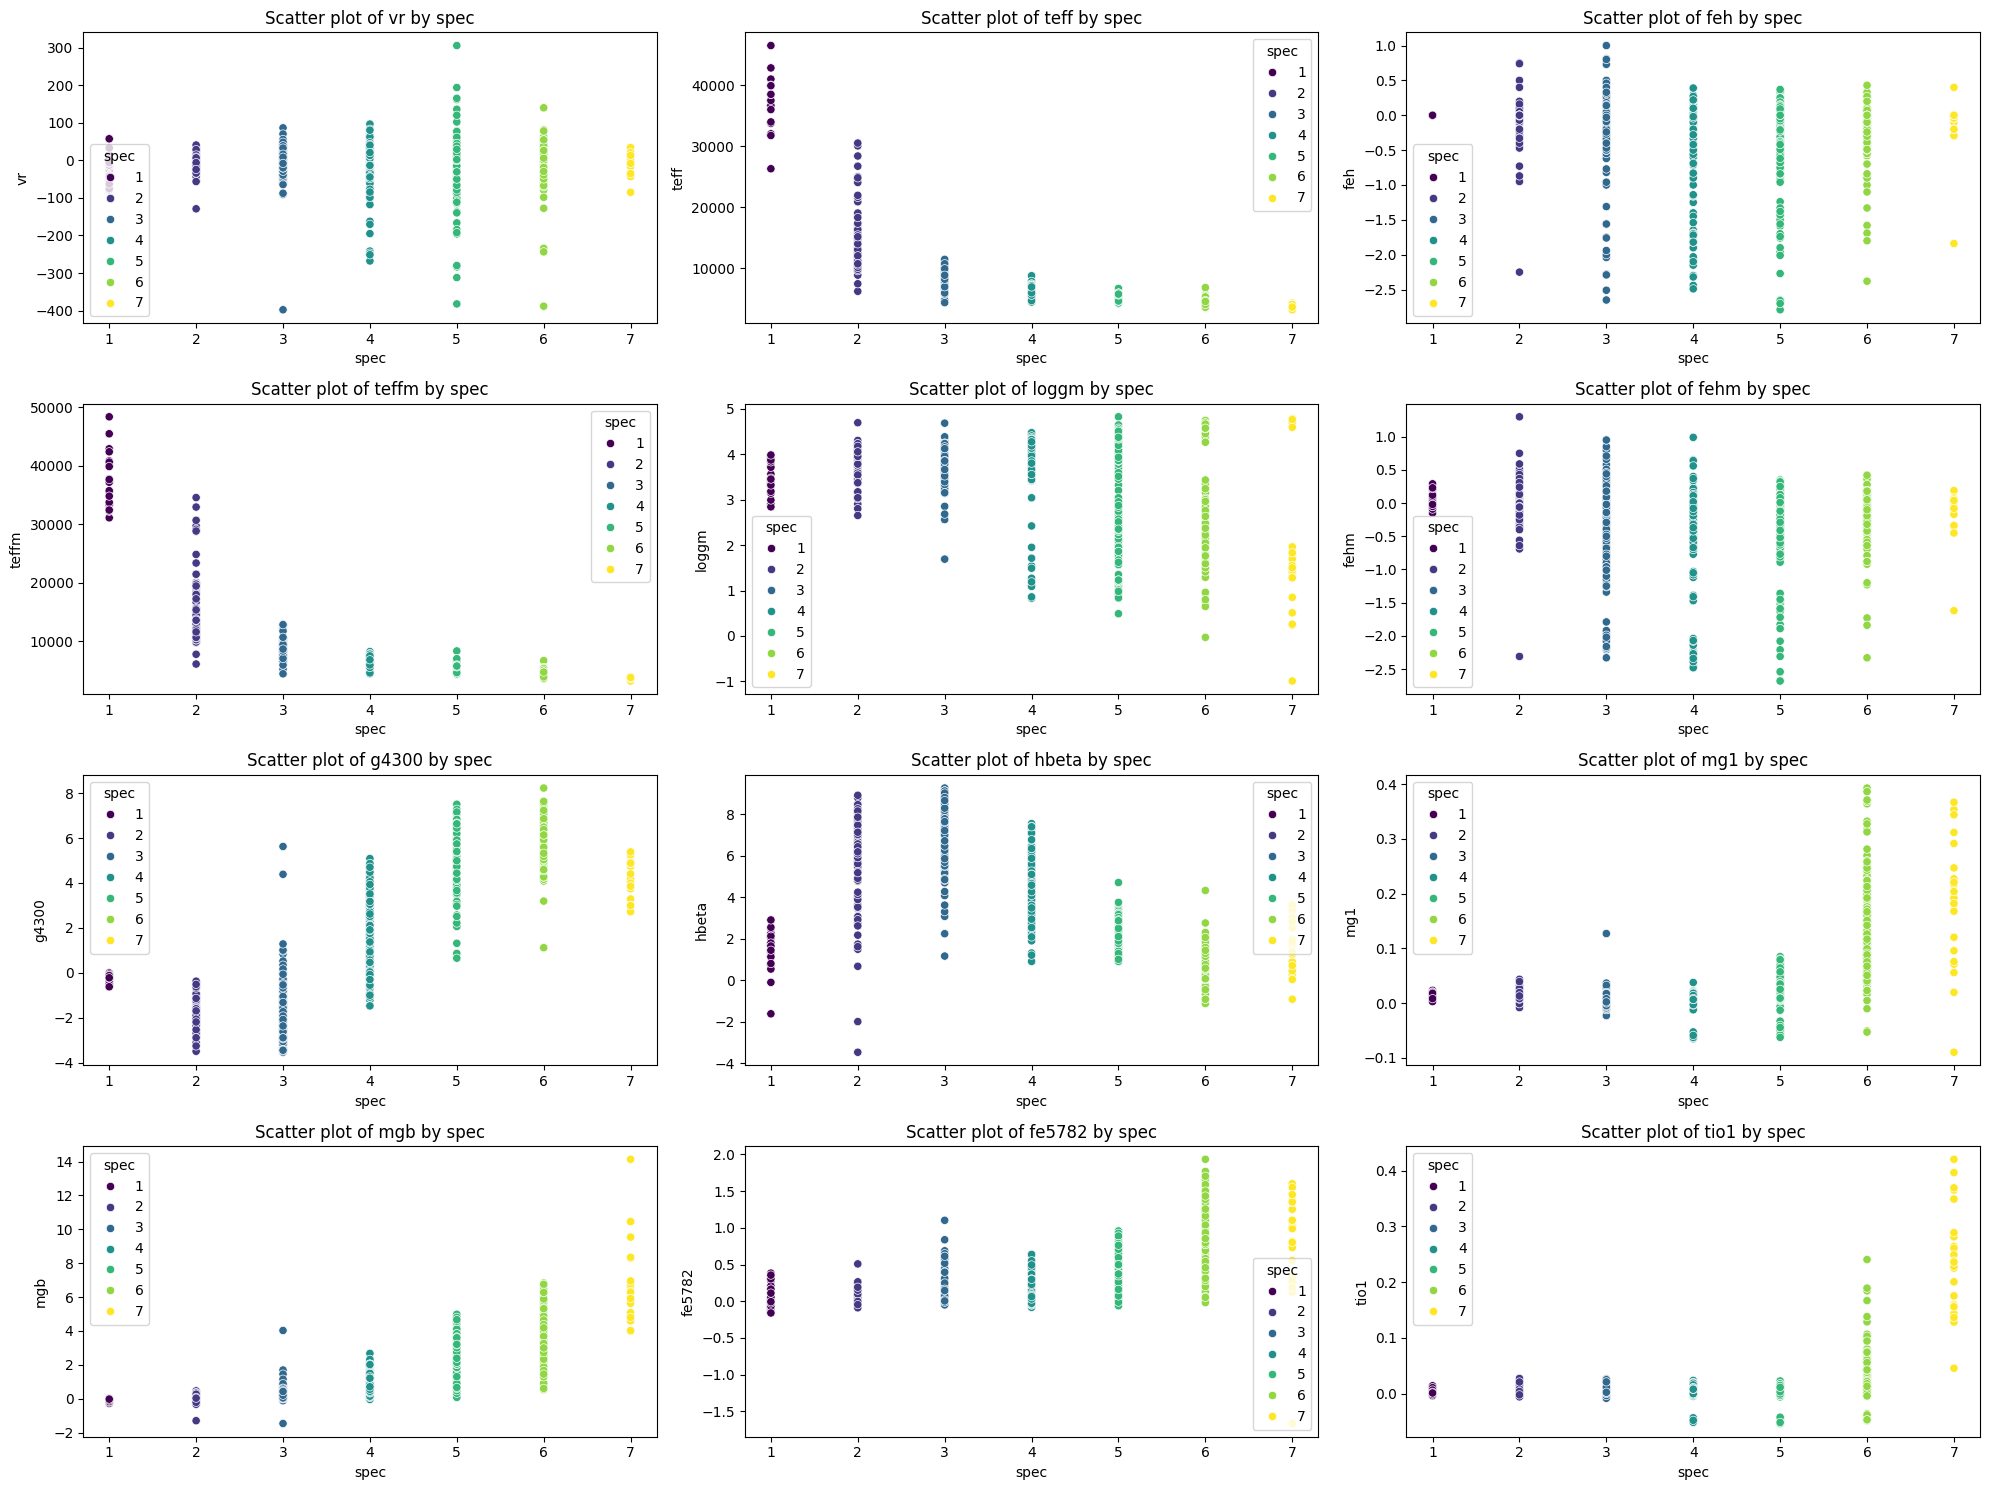

In [38]:
train_data = pd.concat([X_train, y_train], axis=1)
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x='spec', y=col, data=train_data, hue='spec', palette='viridis')
    plt.title(f'Scatter plot of {col} by spec')
    plt.xlabel('spec')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [39]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

ordinal_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder())
])

one_hot_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('ord', ordinal_transformer, ordinal_columns),
        ('onehot', one_hot_transformer, one_hot_columns)
    ]
)

In [41]:
X_train= preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [42]:
print("Shape of X_train_transformed:", X_train.shape)
print("Shape of X_test_transformed:", X_test.shape)

Shape of X_train_transformed: (1082, 17)
Shape of X_test_transformed: (271, 17)


### 2. Baseline and Scoring

Come up with a simple baseline method for predicting the star’s main spectral class. (Which should not involve any learning!) Determine a single value metric and set up functions to print classification reports and confusion matrices.

Evaluate the performance of the simple baseline method according to the metrics defined. Explain the assumption underlying the baseline, and why it was picked.


In [43]:
priors = y_train.value_counts(normalize=True)

In [44]:
priors

spec
5    0.298521
4    0.256932
6    0.201479
3    0.122921
2    0.077634
7    0.022181
1    0.020333
Name: proportion, dtype: float64

In [45]:
classes = priors.index
probabilities = priors.values

In [46]:
np.random.seed(42)
baseline_proba = np.random.choice(classes, size=len(y_test), p=probabilities)

In [47]:
print("Classification Report for Baseline Model (Priors of Each Class):")
print(classification_report(y_test, baseline_proba))

Classification Report for Baseline Model (Priors of Each Class):
              precision    recall  f1-score   support

           1       0.33      0.20      0.25         5
           2       0.08      0.10      0.09        21
           3       0.17      0.15      0.16        33
           4       0.25      0.23      0.24        70
           5       0.30      0.32      0.31        81
           6       0.22      0.22      0.22        55
           7       0.00      0.00      0.00         6

    accuracy                           0.23       271
   macro avg       0.19      0.17      0.18       271
weighted avg       0.23      0.23      0.23       271



In [48]:
print("Confusion Matrix for Baseline Model (Priors of Each Class):")
print(confusion_matrix(y_test, baseline_proba))

Confusion Matrix for Baseline Model (Priors of Each Class):
[[ 1  0  2  2  0  0  0]
 [ 0  2  2  5  8  4  0]
 [ 0  1  5  8 12  4  3]
 [ 1  9  8 16 20 15  1]
 [ 0  6  7 21 26 18  3]
 [ 1  6  6 11 18 12  1]
 [ 0  2  0  0  3  1  0]]


In [49]:
def multiclass_roc_auc_score(y_true, y_score, average = "weighted", multi_class = 'ovr'):
    return roc_auc_score(y_true, y_score, average = average, multi_class = multi_class)
auc_scorer = make_scorer(multiclass_roc_auc_score, response_method = 'predict_proba', multi_class = 'ovr')

In [50]:
y_test_bin = label_binarize(y_test, classes = np.unique(y_test))
y_pred_baseline_bin = label_binarize(baseline_proba, classes = np.unique(y_test))
roc_auc_baseline = roc_auc_score(y_test_bin, y_pred_baseline_bin, average = 'weighted')
roc_auc_baseline

0.5059612925804885

### 3. Non-Neural Network Model

Choose a supervised machine learning model (either covered in class or not) to classify stars. Initialize it with a random state (if applicable), and any parameter that will not be changed. Find optimal hyper-parameters by designing a parameter search:

• Pick hyper-parameters that are relevant to the model complexity.

• Decide on a range of values for each hyper-parameter.

• Fit a model with either a grid or randomized search with built in cross validation.

• Ensure the best possible fit is achieved by re-initializing the search if the best score for a given combination has values on the edge of the parameter grid.

• Once the best model configuration is found, evaluate it on the test set, and compare the performance level with the simple baseline.

Then answer the following: Is this model better than the simple baseline? If so, by how much? Discuss its’ performance in identifying each class. Are there any weaknesses, or strengths?

Note: If the model of choice utilizes gradient descent, make sure each model is given enough iterations to converge. Failure in convergence can be tracked with function printouts and performance levels.

In [51]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 32, 64, 128, 256, 512],
    'min_samples_split': [2, 4, 8, 16],
    'min_samples_leaf': [16, 32, 64, 112]
}

In [52]:
dt = DecisionTreeClassifier(random_state=42)

In [53]:
dt_random = RandomizedSearchCV(estimator=dt, param_distributions=dt_param_grid,
                               n_iter=200, cv=20, verbose=3, random_state=42, n_jobs=-1, scoring=auc_scorer)
dt_random.fit(X_train, y_train)

Fitting 20 folds for each of 192 candidates, totalling 3840 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 192 is smaller than n_iter=200. Running 192 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 4/20] END criterion=gini, max_depth=None, min_samples_leaf=16, min_samples_split=2;, score=0.941 total time=   0.0s
[CV 7/20] END criterion=gini, max_depth=None, min_samples_leaf=16, min_samples_split=2;, score=0.982 total time=   0.0s
[CV 2/20] END criterion=gini, max_depth=None, min_samples_leaf=16, min_samples_split=2;, score=0.950 total time=   0.0s
[CV 6/20] END criterion=gini, max_depth=None, min_samples_leaf=16, min_samples_split=2;, score=0.982 total time=   0.0s
[CV 1/20] END criterion=gini, max_depth=None, min_samples_leaf=16, min_samples_split=2;, score=0.945 total time=   0.0s
[CV 8/20] END criterion=gini, max_depth=None, min_samples_leaf=16, min_samples_split=2;, score=0.949 total time=   0.0s
[CV 5/20] END criterion=gini, max_depth=None, min_samples_leaf=16, min_samples_split=2;, score=0.937 total time=   0.0s
[CV 9/20] END criterion=gini, max_depth=None, min_samples_leaf=16, min_samples_split=2;, score=0.965 total time=   0.0s
[CV 11/20] END criterion=gini, max_depth

RandomizedSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 32, 64, 128, 256,
                                                      512],
                                        'min_samples_leaf': [16, 32, 64, 112],
                                        'min_samples_split': [2, 4, 8, 16]},
                   random_state=42,
                   scoring=make_scorer(multiclass_roc_auc_score, response_method='predict_proba', multi_class=ovr),
                   verbose=3)

In [54]:
best_dt_model = dt_random.best_estimator_
best_dt_model

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=64,
                       random_state=42)

In [55]:
y_test_pred_dt = best_dt_model.predict(X_test)
y_test_pred_dt_proba = best_dt_model.predict_proba(X_test)
print("Decision Tree - Test Set Metrics:")
print(classification_report(y_test, y_test_pred_dt))

Decision Tree - Test Set Metrics:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.75      1.00      0.86        21
           3       0.96      0.76      0.85        33
           4       0.74      0.90      0.81        70
           5       0.74      0.70      0.72        81
           6       0.82      0.82      0.82        55
           7       0.00      0.00      0.00         6

    accuracy                           0.78       271
   macro avg       0.57      0.60      0.58       271
weighted avg       0.75      0.78      0.76       271



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [56]:
rf_param_grid = {
    'n_estimators': [128, 256, 512],
    'max_depth': [32, 64, 128, 256],
    'min_samples_split': [None, 2, 4, 8, 16],
    'min_samples_leaf': [None, 2, 4, 8, 16],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True]
}

In [57]:
rf = RandomForestClassifier(random_state=42)

In [58]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid,
                               n_iter=100, cv=10, verbose=3, random_state=42, n_jobs=-1, scoring=auc_scorer)
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[CV 6/10] END bootstrap=True, max_depth=32, max_features=None, min_samples_leaf=16, min_samples_split=8, n_estimators=256;, score=0.960 total time=   1.2s
[CV 8/10] END bootstrap=True, max_depth=32, max_features=None, min_samples_leaf=16, min_samples_split=8, n_estimators=256;, score=0.987 total time=   1.1s
[CV 7/10] END bootstrap=True, max_depth=32, max_features=None, min_samples_leaf=16, min_samples_split=8, n_estimators=256;, score=0.968 total time=   1.2s
[CV 1/10] END bootstrap=True, max_depth=256, max_features=log2, min_samples_leaf=None, min_samples_split=None, n_estimators=512;, score=nan total time=   0.0s
[CV 2/10] END bootstrap=True, max_depth=256, max_features=log2, min_samples_leaf=None, min_samples_split=None, n_estimators=512;, score=nan total time=   0.0s
[CV 3/10] END bootstrap=True, max_depth=256, max_features=log2, min_samples_leaf=None, min_samples_split=None, n_estimators=512;, score=nan total time=   0.0s
[CV 4/10] END bootstrap=True, max_depth=256, max_features=

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
340 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [32, 64, 128, 256],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [None, 2, 4, 8, 16],
                                        'min_samples_split': [None, 2, 4, 8,
                                                              16],
                                        'n_estimators': [128, 256, 512]},
                   random_state=42,
                   scoring=make_scorer(multiclass_roc_auc_score, response_method='predict_proba', multi_class=ovr),
                   verbose=3)

In [59]:
best_rf_model = rf_random.best_estimator_
best_rf_model

RandomForestClassifier(max_depth=32, min_samples_leaf=4, n_estimators=512,
                       random_state=42)

In [60]:
y_test_pred_rf = best_rf_model.predict(X_test)
y_test_pred_rf_proba = best_rf_model.predict_proba(X_test)
print("Random Forest - Test Set Metrics:")
print(classification_report(y_test, y_test_pred_rf))

Random Forest - Test Set Metrics:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.88      1.00      0.93        21
           3       0.93      0.76      0.83        33
           4       0.78      0.91      0.84        70
           5       0.83      0.70      0.76        81
           6       0.80      0.78      0.79        55
           7       0.60      1.00      0.75         6

    accuracy                           0.82       271
   macro avg       0.83      0.88      0.84       271
weighted avg       0.82      0.82      0.81       271



In [61]:
sgd_param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [5000],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

In [62]:
sgd = SGDClassifier(random_state=42)

In [63]:
sgd_random = RandomizedSearchCV(estimator=sgd, param_distributions=sgd_param_grid,
                                n_iter=200, cv=20, verbose=3, random_state=42, n_jobs=-1, scoring=auc_scorer)
sgd_random.fit(X_train, y_train)

Fitting 20 folds for each of 144 candidates, totalling 2880 fits
[CV 1/20] END alpha=0.0001, learning_rate=constant, loss=hinge, max_iter=5000, penalty=l2;, score=nan total time=   0.0s
[CV 2/20] END alpha=0.0001, learning_rate=constant, loss=hinge, max_iter=5000, penalty=l2;, score=nan total time=   0.0s
[CV 3/20] END alpha=0.0001, learning_rate=constant, loss=hinge, max_iter=5000, penalty=l2;, score=nan total time=   0.0s
[CV 4/20] END alpha=0.0001, learning_rate=constant, loss=hinge, max_iter=5000, penalty=l2;, score=nan total time=   0.0s
[CV 5/20] END alpha=0.0001, learning_rate=constant, loss=hinge, max_iter=5000, penalty=l2;, score=nan total time=   0.0s
[CV 6/20] END alpha=0.0001, learning_rate=constant, loss=hinge, max_iter=5000, penalty=l2;, score=nan total time=   0.0s
[CV 7/20] END alpha=0.0001, learning_rate=constant, loss=hinge, max_iter=5000, penalty=l2;, score=nan total time=   0.0s
[CV 8/20] END alpha=0.0001, learning_rate=constant, loss=hinge, max_iter=5000, penalty=l

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 144 is smaller than n_iter=200. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partia

[CV 20/20] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 12/20] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 1/20] END alpha=0.0001, learning_rate=optimal, loss=log_loss, max_iter=5000, penalty=l2;, score=0.976 total time=   0.0s
[CV 7/20] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/20] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 11/20] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=l2;, score=nan total time=   0.0s
[CV 19/20] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=l2;, score=nan total time=   0.0s
[CV 16/20] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 8/20] END 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
 

[CV 7/20] END alpha=0.0001, learning_rate=optimal, loss=log_loss, max_iter=5000, penalty=l2;, score=0.952 total time=   0.0s
[CV 1/20] END alpha=0.0001, learning_rate=optimal, loss=log_loss, max_iter=5000, penalty=l1;, score=0.964 total time=   0.0s
[CV 3/20] END alpha=0.0001, learning_rate=optimal, loss=modified_huber, max_iter=5000, penalty=l1;, score=0.910 total time=   0.0s
[CV 15/20] END alpha=0.0001, learning_rate=optimal, loss=modified_huber, max_iter=5000, penalty=elasticnet;, score=0.936 total time=   0.0s
[CV 10/20] END alpha=0.0001, learning_rate=optimal, loss=modified_huber, max_iter=5000, penalty=l2;, score=0.928 total time=   0.0s
[CV 11/20] END alpha=0.0001, learning_rate=optimal, loss=log_loss, max_iter=5000, penalty=elasticnet;, score=0.931 total time=   0.0s
[CV 19/20] END alpha=0.0001, learning_rate=optimal, loss=modified_huber, max_iter=5000, penalty=l1;, score=0.934 total time=   0.0s
[CV 8/20] END alpha=0.0001, learning_rate=optimal, loss=log_loss, max_iter=5000, 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
 

[CV 9/20] END alpha=0.001, learning_rate=invscaling, loss=log_loss, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 4/20] END alpha=0.001, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 10/20] END alpha=0.001, learning_rate=invscaling, loss=log_loss, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 2/20] END alpha=0.001, learning_rate=optimal, loss=log_loss, max_iter=5000, penalty=l1;, score=0.962 total time=   0.1s
[CV 11/20] END alpha=0.001, learning_rate=invscaling, loss=log_loss, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 12/20] END alpha=0.001, learning_rate=invscaling, loss=log_loss, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 13/20] END alpha=0.001, learning_rate=invscaling, loss=log_loss, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 14/20] END alpha=0.001, learning_rate=invscaling, loss=log_loss, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[C

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
 

[CV 6/20] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=l2;, score=nan total time=   0.0s
[CV 14/20] END alpha=0.01, learning_rate=optimal, loss=log_loss, max_iter=5000, penalty=l1;, score=0.945 total time=   0.0s
[CV 7/20] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=l2;, score=nan total time=   0.0s
[CV 12/20] END alpha=0.001, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 3/20] END alpha=0.001, learning_rate=optimal, loss=modified_huber, max_iter=5000, penalty=l2;, score=0.946 total time=   0.0s
[CV 11/20] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 6/20] END alpha=0.001, learning_rate=optimal, loss=log_loss, max_iter=5000, penalty=l2;, score=0.991 total time=   0.0s
[CV 15/20] END alpha=0.01, learning_rate=optimal, loss=log_loss, max_iter=5000, penalty=l1;, score=0.983 total time=   0.0s
[CV 8/20] END alpha=0.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
 

[CV 6/20] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 12/20] END alpha=0.001, learning_rate=optimal, loss=modified_huber, max_iter=5000, penalty=l2;, score=0.939 total time=   0.0s
[CV 11/20] END alpha=0.001, learning_rate=optimal, loss=log_loss, max_iter=5000, penalty=l1;, score=0.932 total time=   0.0s
[CV 6/20] END alpha=0.01, learning_rate=optimal, loss=log_loss, max_iter=5000, penalty=elasticnet;, score=0.986 total time=   0.0s
[CV 7/20] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 2/20] END alpha=0.001, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 8/20] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 8/20] END alpha=0.01, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 15

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
 

[CV 11/20] END alpha=0.1, learning_rate=constant, loss=log_loss, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 4/20] END alpha=0.1, learning_rate=constant, loss=modified_huber, max_iter=5000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 12/20] END alpha=0.1, learning_rate=constant, loss=log_loss, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 2/20] END alpha=0.01, learning_rate=optimal, loss=log_loss, max_iter=5000, penalty=l2;, score=0.964 total time=   0.0s
[CV 13/20] END alpha=0.1, learning_rate=constant, loss=log_loss, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 5/20] END alpha=0.1, learning_rate=constant, loss=modified_huber, max_iter=5000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 14/20] END alpha=0.1, learning_rate=constant, loss=log_loss, max_iter=5000, penalty=l1;, score=nan total time=   0.0s
[CV 11/20] END alpha=0.1, learning_rate=constant, loss=modified_huber, max_iter=5000, penalty=elasticnet;, score=nan to

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 344, in _score
 

[CV 18/20] END alpha=0.1, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/20] END alpha=0.1, learning_rate=optimal, loss=log_loss, max_iter=5000, penalty=l2;, score=0.942 total time=   0.0s
[CV 7/20] END alpha=0.01, learning_rate=optimal, loss=modified_huber, max_iter=5000, penalty=l2;, score=0.973 total time=   0.0s
[CV 13/20] END alpha=0.1, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 16/20] END alpha=0.01, learning_rate=optimal, loss=log_loss, max_iter=5000, penalty=l2;, score=0.958 total time=   0.0s
[CV 19/20] END alpha=0.1, learning_rate=optimal, loss=hinge, max_iter=5000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/20] END alpha=0.1, learning_rate=optimal, loss=log_loss, max_iter=5000, penalty=l2;, score=0.941 total time=   0.0s
[CV 8/20] END alpha=0.01, learning_rate=optimal, loss=modified_huber, max_iter=5000, penalty=l2;, score=0.945 total time=   0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
2160 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  

RandomizedSearchCV(cv=20, estimator=SGDClassifier(random_state=42), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                                        'loss': ['hinge', 'log_loss',
                                                 'modified_huber'],
                                        'max_iter': [5000],
                                        'penalty': ['l2', 'l1', 'elasticnet']},
                   random_state=42,
                   scoring=make_scorer(multiclass_roc_auc_score, response_method='predict_proba', multi_class=ovr),
                   verbose=3)

In [64]:
best_sgd_model = sgd_random.best_estimator_
best_sgd_model

SGDClassifier(alpha=0.001, loss='log_loss', max_iter=5000, penalty='elasticnet',
              random_state=42)

In [65]:
y_test_pred_sgd = best_sgd_model.predict(X_test)
y_test_pred_sgd_proba = best_sgd_model.predict_proba(X_test)
print("SGD Classifier - Test Set Metrics:")
print(classification_report(y_test, y_test_pred_sgd))

SGD Classifier - Test Set Metrics:
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       0.86      0.90      0.88        21
           3       0.90      0.82      0.86        33
           4       0.88      0.74      0.81        70
           5       0.72      0.85      0.78        81
           6       0.84      0.75      0.79        55
           7       0.67      1.00      0.80         6

    accuracy                           0.81       271
   macro avg       0.81      0.87      0.83       271
weighted avg       0.82      0.81      0.81       271



Decision Tree ROC AUC Score: 0.9449


Random Forest ROC AUC Score: 0.9719
SGD Classifier ROC AUC Score: 0.9653


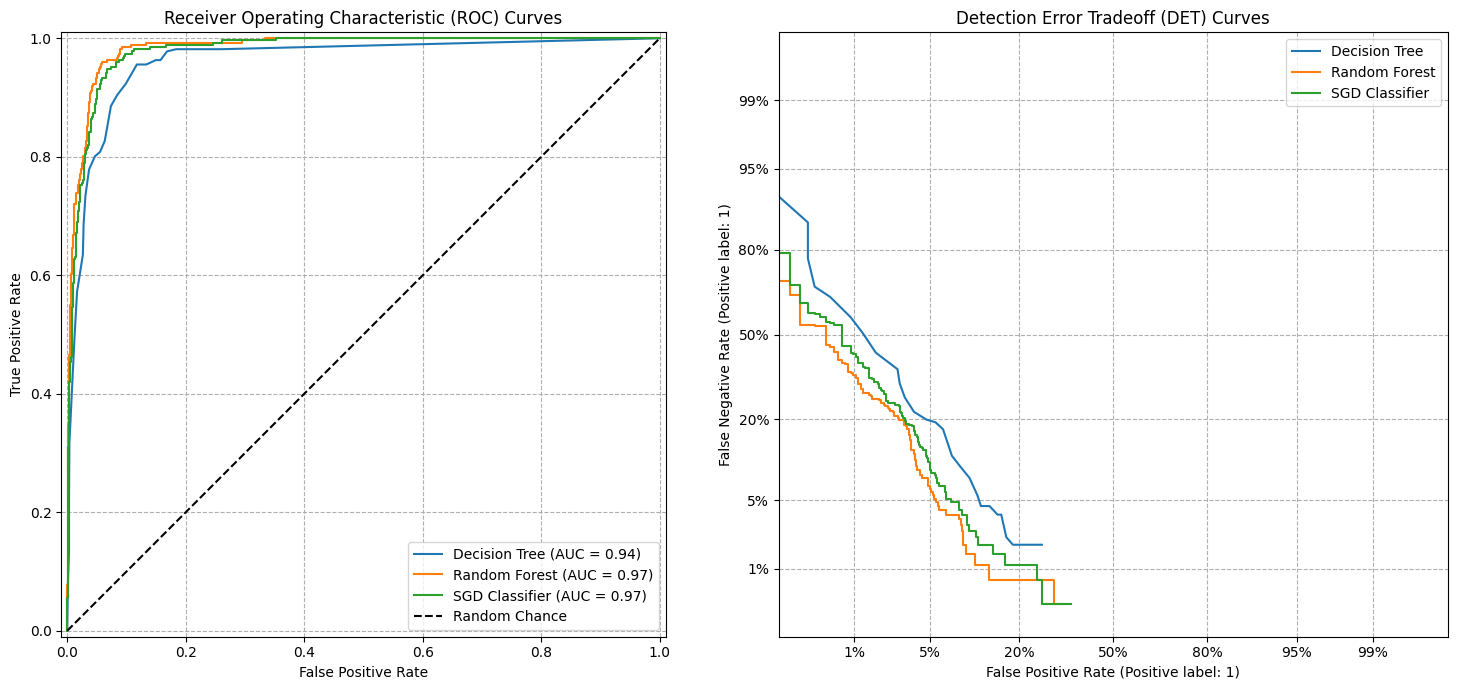

In [66]:
# Plot ROC and DET curves
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(15, 7))

# Define classifiers and their names
classifiers = [
    ('Decision Tree', best_dt_model, y_test_pred_dt_proba),
    ('Random Forest', best_rf_model, y_test_pred_rf_proba),
    ('SGD Classifier', best_sgd_model, y_test_pred_sgd_proba)
    
]

for name, model, proba in classifiers:
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), proba.ravel())
    p_auc = roc_auc_score(y_test_bin, proba, average='weighted', multi_class='ovr')
    
    print(f"{name} ROC AUC Score: {p_auc:.4f}")
    
    # Plot ROC curve
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=p_auc, estimator_name=name).plot(ax=ax_roc)

    # Plot DET curve
    DetCurveDisplay.from_predictions(y_test_bin.ravel(), proba.ravel(), name=name, ax=ax_det)

# Customize the plots
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curves")
ax_det.set_title("Detection Error Tradeoff (DET) Curves")
ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")
ax_roc.plot([0, 1], [0, 1], linestyle='--', color='k', label='Random Chance')
ax_roc.legend()
ax_det.legend()

plt.tight_layout()

# Save the figure as PNG
plt.savefig('roc_det_curves.png', dpi=300)
plt.show()

## 4. Fully Connected Neural Network Optimization

Train neural networks with scikit-learn’s MLPClassifier() module. These networks follow the structure of a multi-layered perceptron.

They comprise of many hidden layers, and each layer can have the same number of neurons or they can change to constrict and expand the flow of information. To keep the search space manageable, focus on the first case only.

Apply the same pre-processing steps before training. Initialize the MLP with a sufficient amount of iterations, (not the default value), a random state and other fixed parameters.

Find optimal values of number of layers and number of neurons per layer by utilizing a grid search specifically. (Having a small search space should be beneficial here.) Some tips:

    • Using the following line one can generate all unique combinations of number of layers and number of neurons.
np.array(np.meshgrid(hidd, nlr)).T.reshape(-1, 2)

    • Each combination will need to be converted to a format that MLPClassifier() can take as input.

After finding the best neural network configuration, answer the following:

    • Test the final model’s performance against the test set and compare your results with the baseline and the non-neural network model. Are there any improvements?

    • How does model depth and width affect the performance levels? Cross validation results can be plotted using heatmaps, 3D graphs or simple line graphs to illustrate this point.

    • Finally, using a technique of your choosing (permutation importance, SHAP values, tree feature importances), explain how much these models rely on each feature overall. Do different models prioritize different features?

In [67]:
hidd = [2, 3]
nlr = [256, 512]
layer_combinations = np.array(np.meshgrid(hidd, nlr)).T.reshape(-1, 2)

# Results storage
results = []

# Loop through each combination
for h, n in layer_combinations:
    # Convert to tuple format expected by MLPClassifier
    hidden_layer_sizes = tuple([n] * h)
    
    # Define parameter grid for this combination
    param_grid = {
        'activation': ['relu'],
        'solver': ['sgd'],
        'alpha': [0.5, 1.0],
        'learning_rate': ['adaptive'],
        'max_iter': [800],
        'random_state': [42],
        'batch_size': [128]
    }
    
    # Initialize MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes)
    
    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, verbose=3, n_jobs=-1, scoring=auc_scorer)
    
    # Fit GridSearchCV on training data
    grid_search.fit(X_train, y_train)
    
    # Save results
    results.append((h, n, grid_search.best_params_, grid_search.best_score_))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV 3/3] END activation=relu, alpha=0.5, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.981 total time=  17.5s
[CV 1/3] END activation=relu, alpha=0.5, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.980 total time=  17.5s
[CV 3/3] END activation=relu, alpha=1.0, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.981 total time=  17.5s
[CV 2/3] END activation=relu, alpha=1.0, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.970 total time=  17.6s
[CV 1/3] END activation=relu, alpha=1.0, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.980 total time=  17.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.5, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.970 total time=  17.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 3 folds for each of 2 candidates, totalling 6 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV 1/3] END activation=relu, alpha=0.5, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.980 total time= 1.1min
[CV 2/3] END activation=relu, alpha=0.5, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.971 total time= 1.1min
[CV 2/3] END activation=relu, alpha=1.0, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.971 total time= 1.1min
[CV 3/3] END activation=relu, alpha=0.5, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.981 total time= 1.1min
[CV 1/3] END activation=relu, alpha=1.0, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.980 total time= 1.1min


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=1.0, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.980 total time= 1.1min


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 3 folds for each of 2 candidates, totalling 6 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=1.0, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.971 total time=  29.2s
[CV 3/3] END activation=relu, alpha=0.5, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.981 total time=  29.3s
[CV 3/3] END activation=relu, alpha=1.0, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.981 total time=  29.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.5, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.971 total time=  29.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.5, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.978 total time=  32.3s
[CV 1/3] END activation=relu, alpha=1.0, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.979 total time=  32.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 3 folds for each of 2 candidates, totalling 6 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV 2/3] END activation=relu, alpha=1.0, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.971 total time= 2.0min
[CV 2/3] END activation=relu, alpha=0.5, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.971 total time= 2.0min
[CV 1/3] END activation=relu, alpha=1.0, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.979 total time= 2.0min
[CV 3/3] END activation=relu, alpha=0.5, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.981 total time= 2.0min


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=1.0, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.981 total time= 2.0min
[CV 1/3] END activation=relu, alpha=0.5, batch_size=128, learning_rate=adaptive, max_iter=800, random_state=42, solver=sgd;, score=0.978 total time= 2.0min


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


In [68]:
print(f"Hidden Layers: {h}, Neurons per Layer: {n}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")
print()

Hidden Layers: 3, Neurons per Layer: 512
Best Parameters: {'activation': 'relu', 'alpha': 1.0, 'batch_size': 128, 'learning_rate': 'adaptive', 'max_iter': 800, 'random_state': 42, 'solver': 'sgd'}
Best Score: 0.9769233125111852



In [69]:
best_model = grid_search.best_estimator_
y_pred_nn = best_model.predict(X_test)
print("Test Set Metrics:")
print(classification_report(y_test, y_pred_nn))

Test Set Metrics:
              precision    recall  f1-score   support

           1       0.71      1.00      0.83         5
           2       0.94      0.71      0.81        21
           3       0.84      0.79      0.81        33
           4       0.77      0.91      0.84        70
           5       0.81      0.75      0.78        81
           6       0.86      0.78      0.82        55
           7       0.67      1.00      0.80         6

    accuracy                           0.81       271
   macro avg       0.80      0.85      0.81       271
weighted avg       0.82      0.81      0.81       271



In [70]:
pred_prob_nn = best_model.predict_proba(X_test)
roc_auc_nn = roc_auc_score(y_test_bin, pred_prob_nn, multi_class= 'ovr', average = 'weighted')

In [71]:
roc_auc_dt = roc_auc_score(y_test_bin, y_test_pred_dt_proba, multi_class='ovr', average='weighted')
roc_auc_rf = roc_auc_score(y_test_bin, y_test_pred_rf_proba, multi_class='ovr', average='weighted')
roc_auc_sgd = roc_auc_score(y_test_bin, y_test_pred_sgd_proba, multi_class='ovr', average='weighted')


print(f"Decision Tree ROC AUC Score: {roc_auc_dt:.4f}")
print(f"Random Forest ROC AUC Score: {roc_auc_rf:.4f}")
print(f"SGD Classifier ROC AUC Score: {roc_auc_sgd:.4f}")
print(f"NN ROC AUC Score: {roc_auc_nn:.4f}")

Decision Tree ROC AUC Score: 0.9449
Random Forest ROC AUC Score: 0.9719
SGD Classifier ROC AUC Score: 0.9653
NN ROC AUC Score: 0.9741


Decision Tree ROC AUC Score: 0.9449
Random Forest ROC AUC Score: 0.9719
SGD Classifier ROC AUC Score: 0.9653
Neural Network ROC AUC Score: 0.9741


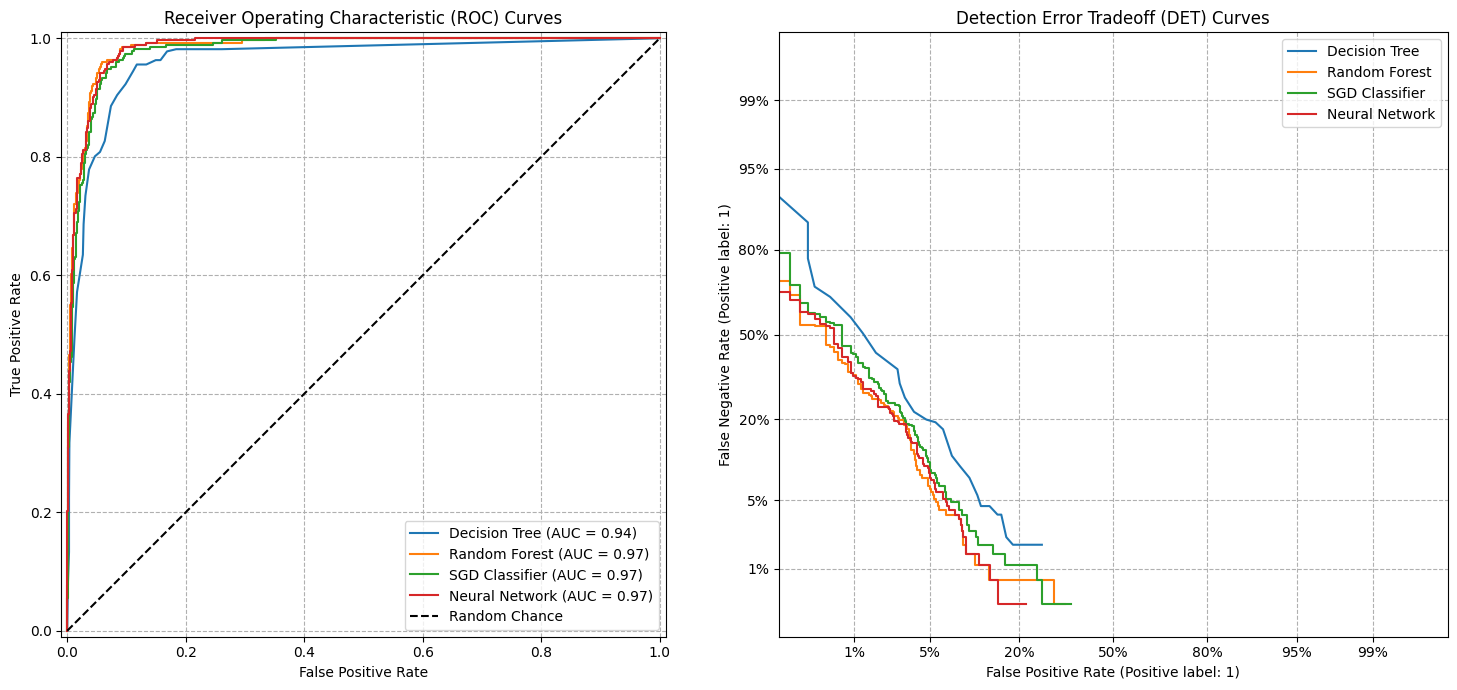

In [72]:
# Plot ROC and DET curves
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(15, 7))

# Define classifiers and their names
classifiers = [
    ('Decision Tree', best_dt_model, y_test_pred_dt_proba),
    ('Random Forest', best_rf_model, y_test_pred_rf_proba),
    ('SGD Classifier', best_sgd_model, y_test_pred_sgd_proba),
    ('Neural Network', y_pred_nn, pred_prob_nn)
    
]

for name, model, proba in classifiers:
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), proba.ravel())
    p_auc = roc_auc_score(y_test_bin, proba, average='weighted', multi_class='ovr')
    
    print(f"{name} ROC AUC Score: {p_auc:.4f}")
    
    # Plot ROC curve
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=p_auc, estimator_name=name).plot(ax=ax_roc)

    # Plot DET curve
    DetCurveDisplay.from_predictions(y_test_bin.ravel(), proba.ravel(), name=name, ax=ax_det)

# Customize the plots
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curves")
ax_det.set_title("Detection Error Tradeoff (DET) Curves")
ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")
ax_roc.plot([0, 1], [0, 1], linestyle='--', color='k', label='Random Chance')
ax_roc.legend()
ax_det.legend()

plt.tight_layout()

# Save the figure as PNG
plt.savefig('roc_det_curves.png', dpi=300)
plt.show()

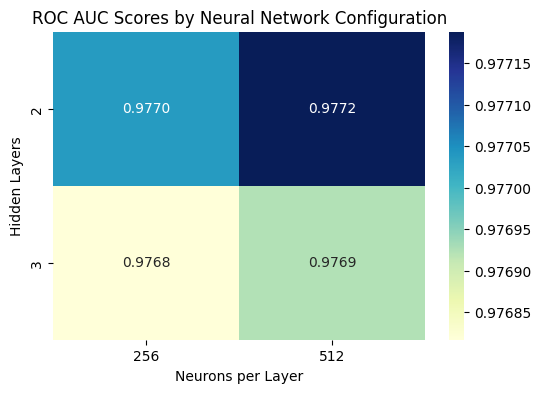

In [73]:
results_df = pd.DataFrame(results, columns=['Hidden Layers', 'Neurons per Layer', 'Best Params', 'Best ROC AUC'])

# Pivot table for heatmap
heatmap_data = results_df.pivot(index='Hidden Layers', columns='Neurons per Layer', values='Best ROC AUC')

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.4f', cbar=True)
plt.title('ROC AUC Scores by Neural Network Configuration')
plt.xlabel('Neurons per Layer')
plt.ylabel('Hidden Layers')
plt.savefig('roc_auc_heatmap.png', dpi=300)
plt.show()

### Bonus

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


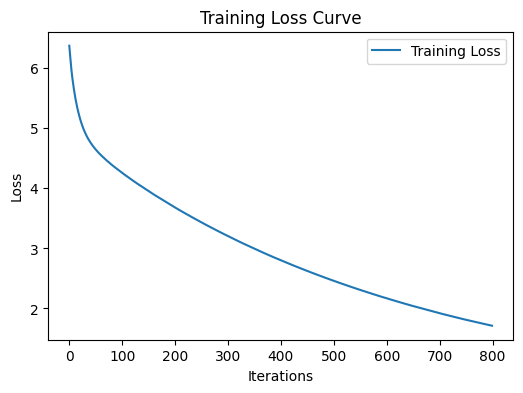

In [74]:
history = best_model.fit(X_train, y_train)

# Plot loss curve
plt.figure(figsize=(6, 4))
plt.plot(history.loss_curve_, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.savefig('training loss curve.png', dpi=300)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


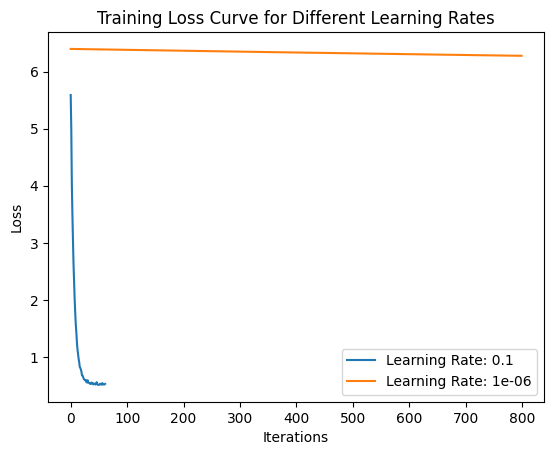

In [75]:
def plot_loss_curve(model, X_train, y_train, learning_rate):
    model.learning_rate = 'constant'
    model.learning_rate_init = learning_rate
    history = model.fit(X_train, y_train)
    plt.plot(history.loss_curve_, label=f'Learning Rate: {learning_rate}')

# Plot loss curve for learning rate 0.1
plot_loss_curve(best_model, X_train, y_train, 0.1)

# Plot loss curve for learning rate 0.000001
plot_loss_curve(best_model, X_train, y_train, 0.000001)

# Plot settings
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve for Different Learning Rates')
plt.legend()
plt.savefig('training loss curve for Different Learning Rates.png', dpi=300)
plt.show()

### 5. Clustering Analysis

Analyze how these stars occupy the feature plane by using clustering algorithms and visualisations.

• Use the K-Means clustering algorithm to determine the optimal number of clusters using the sum of squared errors and silhouette scores. Does the optimal cluster number represent the number of classes in our dataset?

• Calculate two dimensional approximations of the feature space with the PCA and T-SNE algorithms. With a scatter plot, show the two components and color each point by the original label.

Which type of manifold captures more visually distinct clusters? Can feature scales affect the clustering? If so, unify feature scales. Choose one technique for further analyses.

• With scatter plots, show the two components from PCA/T-SNE and color each point by the predicted clusters in k=optimal and k=7 scenarios in K-Means. Are any fundamental characteristics captured by the model with optimal number of clusters? Is there any overlap between the clusters and original labels? This can also be compared with differences of predictions and true labels (whether a particular class always takes the unrelated cluster number).

• Utilize the DBSCAN algorithm and find the optimal value for the distance metric that determines whether two points belong to different clusters by checking the silhouette scores and using the PCA/T-SNE plots. How many clusters are predicted by the optimal model? Observe which stars take the unknown class, and whether their attributes are abnormal.

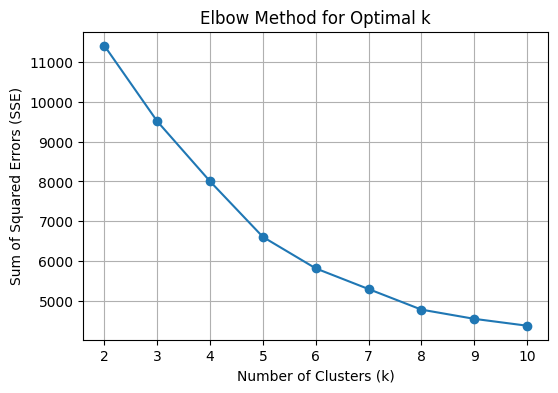

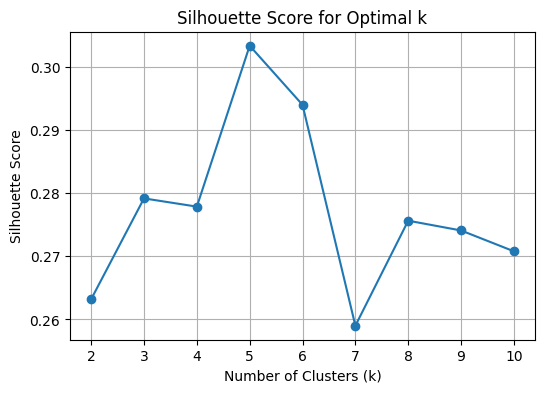

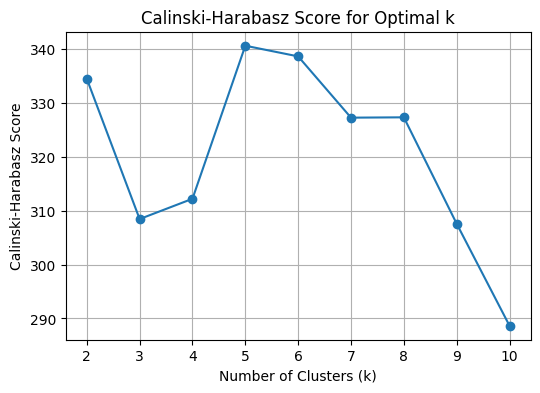

In [76]:
sse = []
silhouette_scores = []
calinski_scores = []
max_clusters = 10

# Iterate over different values of k
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train)
    
    # SSE (sum of squared errors)
    sse.append(kmeans.inertia_)
    
    # Silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_train, labels)
    silhouette_scores.append(silhouette_avg)
    
    # Calinski-Harabasz score
    calinski_score = calinski_harabasz_score(X_train, labels)
    calinski_scores.append(calinski_score)

# Determine the optimal k using the elbow method (SSE)
plt.figure(figsize=(6, 4))
plt.plot(range(2, max_clusters + 1), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Determine the optimal k using silhouette score
plt.figure(figsize=(6, 4))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()

# Determine the optimal k using Calinski-Harabasz score
plt.figure(figsize=(6, 4))
plt.plot(range(2, max_clusters + 1), calinski_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score for Optimal k')
plt.grid(True)
plt.show()

In [77]:
optimal_k = np.argmax(silhouette_scores) + 2  # Add 2 because range starts from 2
print(f'Optimal number of clusters (based on silhouette score): {optimal_k}')

Optimal number of clusters (based on silhouette score): 5


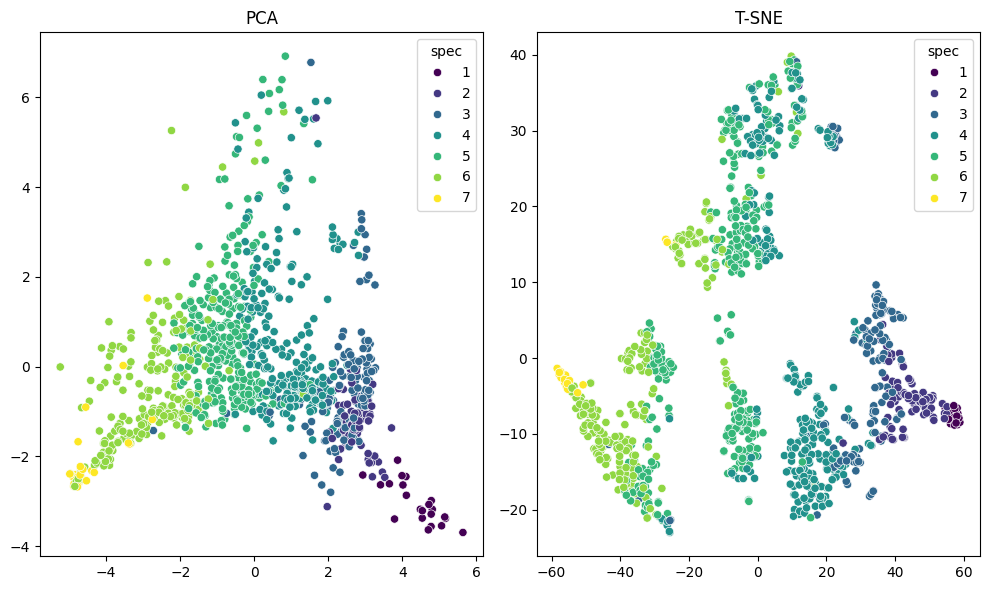

In [78]:
pca = PCA(n_components=2, random_state=0)
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform data
X_train_pca = pca.fit_transform(X_train)
X_train_tsne = tsne.fit_transform(X_train)

# Plot PCA and T-SNE
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis')
plt.title('PCA')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train, palette='viridis')
plt.title('T-SNE')

plt.tight_layout()
plt.savefig('pcatsna.png', dpi=300)
plt.show()

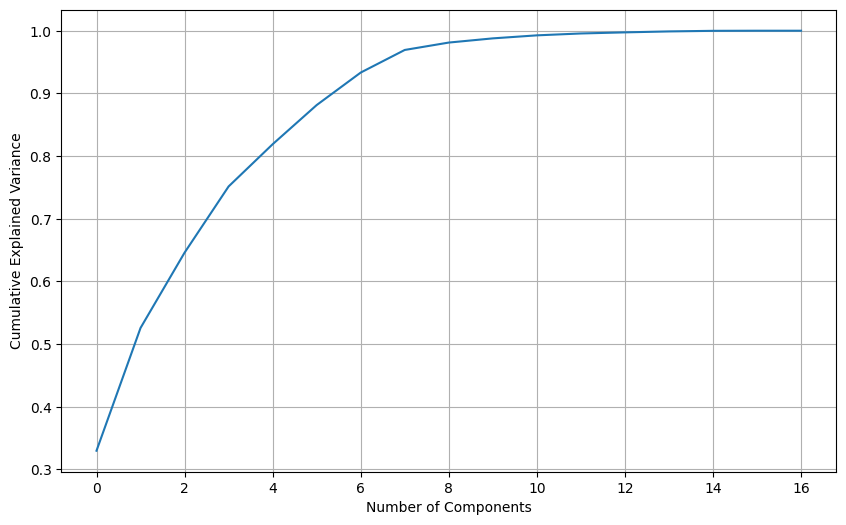

In [79]:
pca = PCA()
pca.fit(X_train)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [80]:
kmeans_final = KMeans(n_clusters=7, random_state=0)

# Fit KMeans on training data and predict clusters
y_pred_train = kmeans_final.fit_predict(X_train)
cluster_centers = kmeans_final.cluster_centers_
y_pred_test = kmeans_final.predict(X_test)
train_cluster_counts = {i: sum(y_pred_train == i) for i in range(7)}
test_cluster_counts = {i: sum(y_pred_test == i) for i in range(7)}

print("Cluster Counts in Training Data:")
print(train_cluster_counts)
print("\nCluster Counts in Test Data:")
print(test_cluster_counts)

Cluster Counts in Training Data:
{0: 210, 1: 190, 2: 268, 3: 74, 4: 38, 5: 236, 6: 66}

Cluster Counts in Test Data:
{0: 60, 1: 40, 2: 70, 3: 20, 4: 12, 5: 57, 6: 12}


In [81]:
# Calculate ARI between true labels and predicted clusters on training data
ari_train = adjusted_rand_score(y_train, y_pred_train)
print(f"Adjusted Rand Index (ARI) on Training Data: {ari_train}")

# Calculate ARI between true labels and predicted clusters on test data
ari_test = adjusted_rand_score(y_test, y_pred_test)
print(f"Adjusted Rand Index (ARI) on Test Data: {ari_test}")

Adjusted Rand Index (ARI) on Training Data: 0.23945909897067882
Adjusted Rand Index (ARI) on Test Data: 0.2407915831461142


In [82]:
silhouette_train = silhouette_score(X_train, y_pred_train)
print(f"Silhouette Score on Training Data: {silhouette_train}")

# Calculate silhouette score for test data
silhouette_test = silhouette_score(X_test, y_pred_test)
print(f"Silhouette Score on Test Data: {silhouette_test}")

Silhouette Score on Training Data: 0.2589987824336232
Silhouette Score on Test Data: 0.2732297587544885


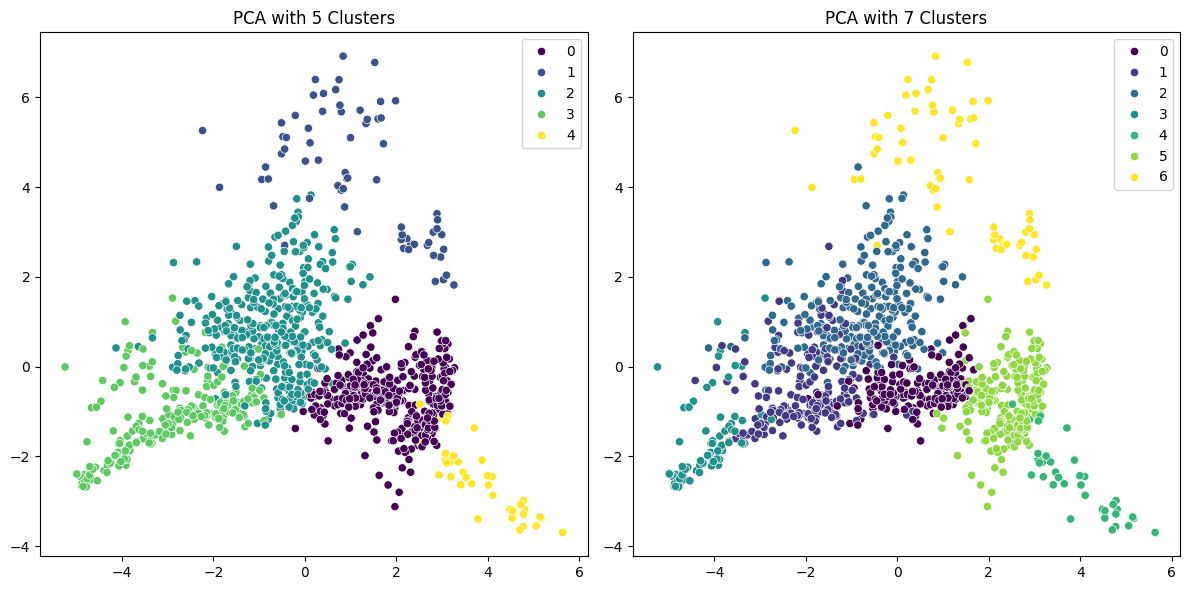

In [83]:
# Fit K-Means with optimal_k clusters
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=0)
pred_optimal = optimal_kmeans.fit_predict(X_train)

# Fit K-Means with k=7 clusters
k7_kmeans = KMeans(n_clusters=7, random_state=0)
pred_k7 = k7_kmeans.fit_predict(X_train)

# Plot PCA and T-SNE with predicted clusters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=pred_optimal, palette='viridis')
plt.title(f'PCA with {optimal_k} Clusters')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=pred_k7, palette='viridis')
plt.title('PCA with 7 Clusters')

plt.tight_layout()
plt.savefig('pcat57.png', dpi=300)
plt.show()

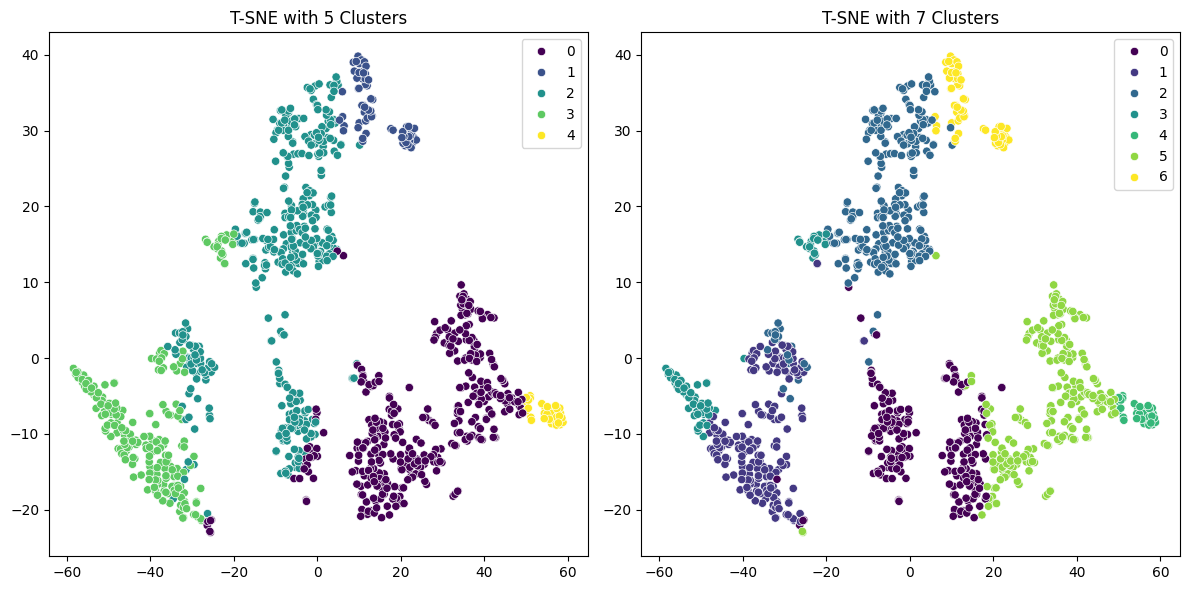

In [84]:
# Fit K-Means with optimal_k clusters
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=0)
pred_optimal = optimal_kmeans.fit_predict(X_train)

# Fit K-Means with k=7 clusters
k7_kmeans = KMeans(n_clusters=7, random_state=0)
pred_k7 = k7_kmeans.fit_predict(X_train)

# Plot T-SNE with predicted clusters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=pred_optimal, palette='viridis')
plt.title(f'T-SNE with {optimal_k} Clusters')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=pred_k7, palette='viridis')
plt.title('T-SNE with 7 Clusters')

plt.tight_layout()
plt.savefig('tsne57.png', dpi=300)
plt.show()


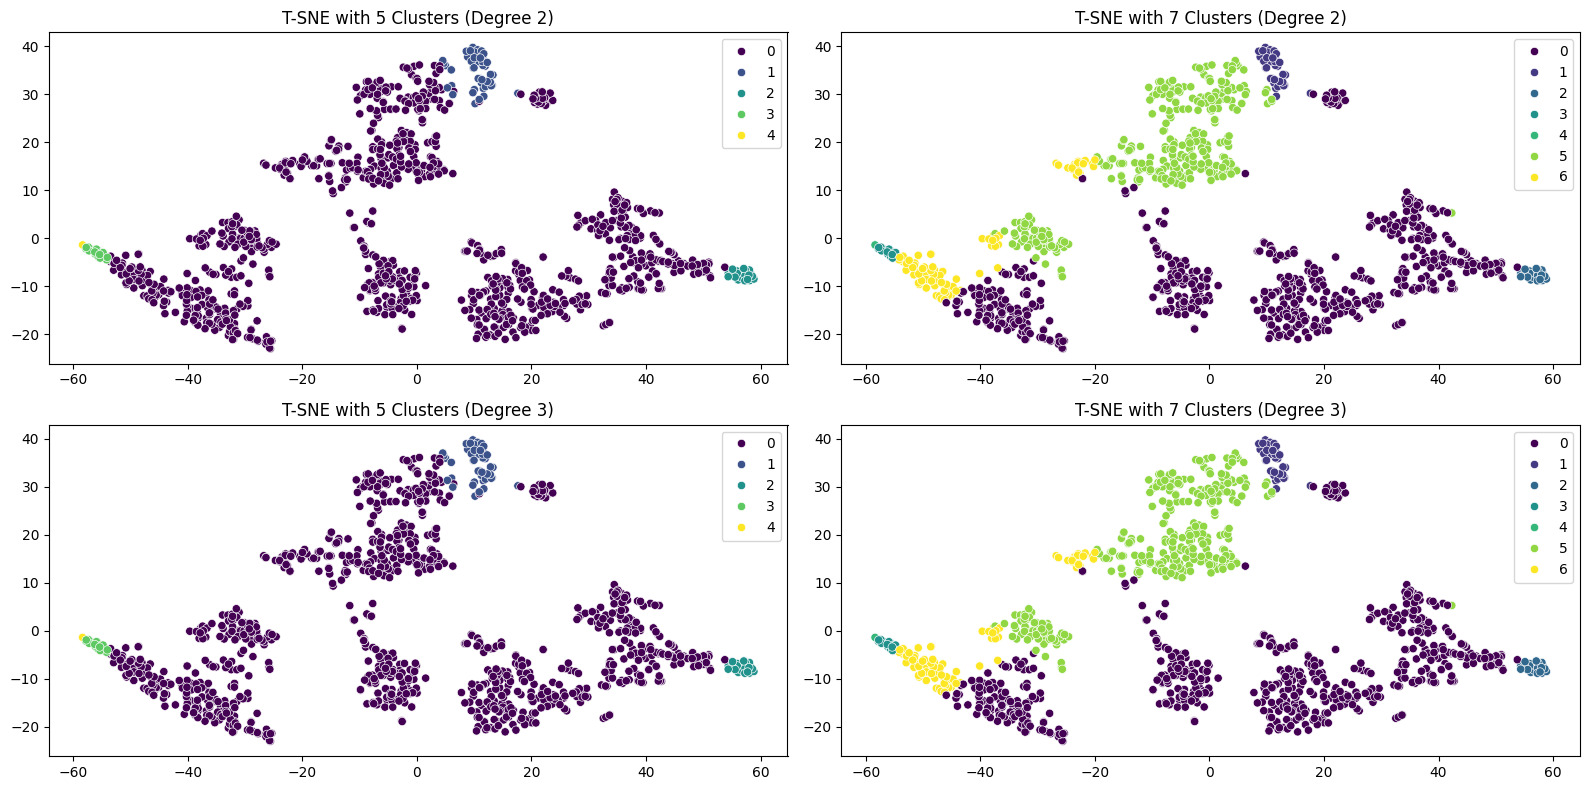

In [85]:
degrees = [2, 3]
optimal_k_values = [5, 7]

# Initialize lists to store results
pred_optimal_polys = []

# Fit pipeline with different degrees of polynomial features and clusters
for degree in degrees:
    for optimal_k in optimal_k_values:
        pipeline = Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('kmeans', KMeans(n_clusters=optimal_k, random_state=0))
        ])

        # Fit pipeline on training data
        pipeline.fit(X_train)

        # Predict clusters
        pred_optimal_poly = pipeline.predict(X_train)
        pred_optimal_polys.append(pred_optimal_poly)

# Plot T-SNE with predicted clusters after polynomial transformation for different degrees and cluster numbers
plt.figure(figsize=(16, 8))
subplot_idx = 1
for degree in degrees:
    for idx, optimal_k in enumerate(optimal_k_values):
        plt.subplot(len(degrees), len(optimal_k_values), subplot_idx)
        sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=pred_optimal_polys[idx], palette='viridis')
        plt.title(f'T-SNE with {optimal_k} Clusters (Degree {degree})')
        subplot_idx += 1

plt.tight_layout()
plt.savefig('tsne_poly_degrees_clusters.png', dpi=300)
plt.show()

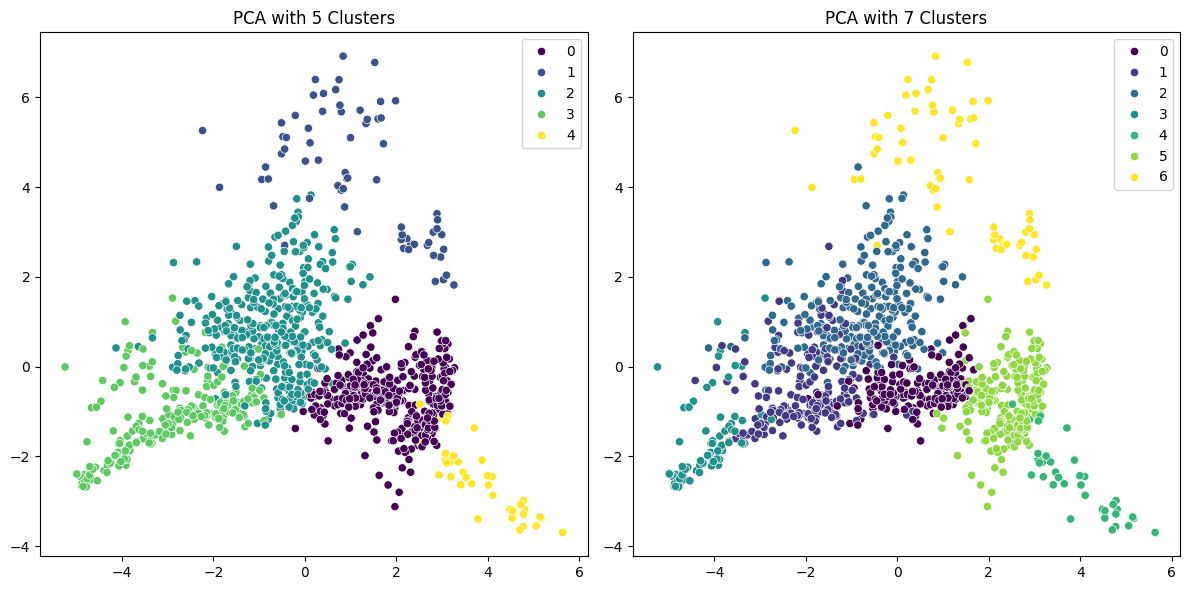

In [86]:
optimal_k = 5
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=0)
pred_optimal = optimal_kmeans.fit_predict(X_train)

# Fit K-Means with k=7 clusters
k7_kmeans = KMeans(n_clusters=7, random_state=0)
pred_k7 = k7_kmeans.fit_predict(X_train)

# Initialize PCA with n_components=2
pca = PCA(n_components=2, random_state=0)

# Fit and transform data with PCA
X_train_pca = pca.fit_transform(X_train)

# Initialize PolynomialFeatures with degree=2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Plot PCA with predicted clusters after polynomial transformation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=pred_optimal, palette='viridis')
plt.title(f'PCA with {optimal_k} Clusters')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=pred_k7, palette='viridis')
plt.title('PCA with 7 Clusters')

plt.tight_layout()
plt.savefig('pca_poly.png', dpi=300)
plt.show()

In [87]:
eps_values = np.linspace(0.1, 2.0, 20)
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(X_train)
    
    # Calculate silhouette score if more than one cluster is formed
    if len(np.unique(labels)) > 1:
        silhouette_avg = silhouette_score(X_train, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)

# Determine optimal eps based on highest silhouette score
optimal_eps = eps_values[np.argmax(silhouette_scores)]
print(f'Optimal eps for DBSCAN: {optimal_eps:.2f}')

# Fit DBSCAN with optimal eps
dbscan_optimal = DBSCAN(eps=optimal_eps)
dbscan_labels = dbscan_optimal.fit_predict(X_train)

# Count number of clusters formed by DBSCAN
num_clusters = len(np.unique(dbscan_labels))
print(f'Number of clusters predicted by DBSCAN with optimal eps: {num_clusters}')

# Count points in the "unknown" cluster (-1)
unknown_count = np.sum(dbscan_labels == -1)
print(f'Number of points in the "unknown" cluster: {unknown_count}')

Optimal eps for DBSCAN: 1.90
Number of clusters predicted by DBSCAN with optimal eps: 5
Number of points in the "unknown" cluster: 59


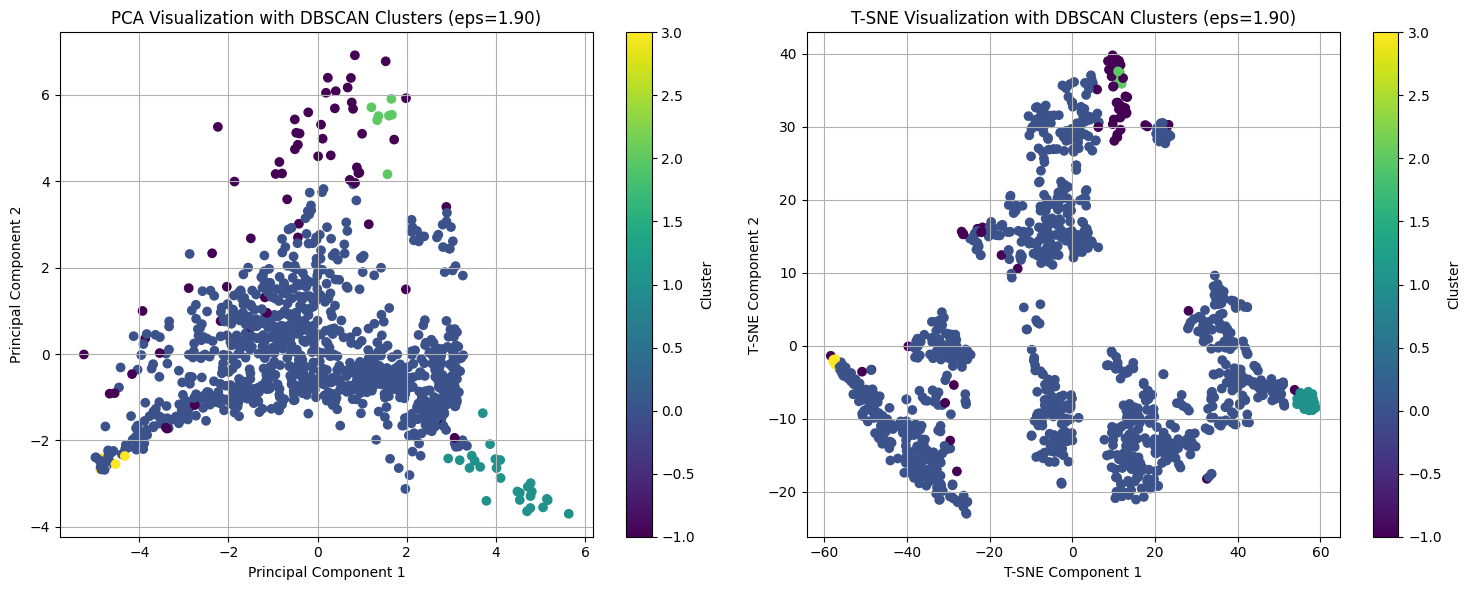

In [88]:
plt.figure(figsize=(15, 6))

# PCA visualization with DBSCAN clusters
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title(f'PCA Visualization with DBSCAN Clusters (eps={optimal_eps:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)

# T-SNE visualization with DBSCAN clusters
plt.subplot(1, 2, 2)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=dbscan_labels, cmap='viridis')
plt.title(f'T-SNE Visualization with DBSCAN Clusters (eps={optimal_eps:.2f})')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)

plt.tight_layout()
plt.show()